# Gene expression at each step

In [3]:
import re

# Read data from file
with open("test1.txt", "r") as file:
    lines = file.readlines()

# Initialize variables
step_results = {}  # Dictionary to store results for each step

# Iterate through lines
i = 0
while i < len(lines):
    # Extract step number using regular expression
    step_number_match = re.match(r"Step ([\d.]+[eE][+-]?\d+):", lines[i])
    if step_number_match:
        step_number = float(step_number_match.group(1))
    else:
        # Skip this line if it doesn't match the expected format
        i += 1
        continue
    
    # Extract matrix for this step
    matrix_lines = lines[i+1:i+4]
    matrix = [[float(x) for x in line.split()] for line in matrix_lines]
 
    # Calculate expression for this step
    results = [(n-1) * matrix[0][n] + (n-1) * matrix[1][n] + (n-1) * matrix[2][n] for n in range(len(matrix[0]))]

    # Store results for this step
    step_results[step_number] = sum(results)
    
    # Move to next step
    i += 5  # Move to the next "Step X:" line (4 lines for the matrix + 1 blank line)

# Write results to file
with open("GE_distribution_lambda_5.txt", "w") as outfile:
    for step, result in step_results.items():
        outfile.write(f"{step}:{result}\n")



In [1]:
# import pandas as pd

# # Read the data
# df2 = pd.read_csv('enh_num_20_time_AC_test1.txt', header=None, sep='\s+')
# df = pd.read_csv('GE_distribution_lambda_5.txt', header=None, sep=':')

# # Rename the columns to ensure the first columns have the same name for merging
# df2.columns = ['key', 'AC']
# df.columns = ['key', 'Cluster']

# # Merge the DataFrames on the 'key' column
# merged_df = pd.merge(df, df2, on='key')

# # Display the merged DataFrame
# merged_df


In [203]:
# merged_df['Cluster']=merged_df['Cluster']/max(merged_df['Cluster'])

In [204]:
# merged_df

,key,Cluster,AC
0,0.057751,0.000000,1.0
1,0.084645,0.000000,1.0
2,0.095994,0.052632,1.0
3,0.148949,0.105263,1.0
4,0.152952,0.052632,1.0
...,...,...,...
999995,16580.590000,0.736842,1.0
999996,16580.600000,0.789474,1.0
999997,16580.680000,0.736842,1.0
999998,16580.720000,0.842105,1.0


In [23]:
merged_df.corr()

,key,Cluster,AC
key,1.000000,-0.001046,NaN
Cluster,-0.001046,1.000000,NaN
AC,NaN,NaN,NaN


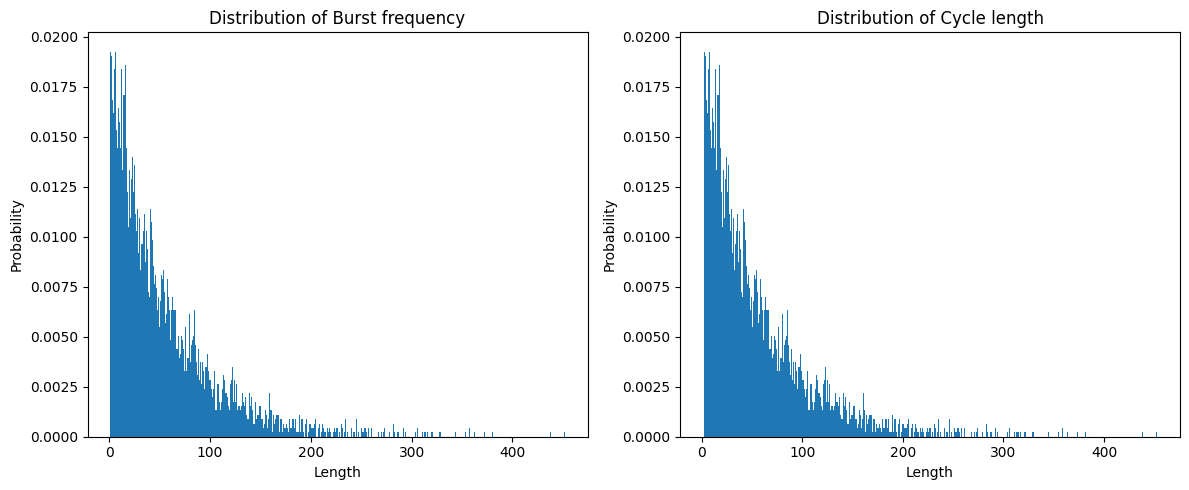

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the file
data = np.loadtxt('enh_num_20_time_AC_test1.txt')

# Extract the columns
time = data[:, 0]
AC = data[:, 1]

# Initialize lists to store lengths of consecutive 100s and lengths of consecutive zeros and 100s before going back to zero
consecutive_100_lengths = []
consecutive_zeros_and_100s_lengths = []

# Initialize variables to track lengths
current_consecutive_100_length = 0
current_zeros_and_100s_length = 0

# Iterate over the data to calculate lengths
for i in range(len(AC)):
    if AC[i] == 100:
        current_consecutive_100_length += 1
        current_zeros_and_100s_length += 1
    else:
        if current_consecutive_100_length > 0:
            consecutive_100_lengths.append(current_consecutive_100_length)
            current_consecutive_100_length = 0

        current_zeros_and_100s_length += 1
        if current_zeros_and_100s_length > 1:
            consecutive_zeros_and_100s_lengths.append(current_zeros_and_100s_length)
        current_zeros_and_100s_length = 0

# Plot the distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(consecutive_100_lengths, bins=np.arange(1, max(consecutive_100_lengths) + 2), density=True)
plt.xlabel('Length')
plt.ylabel('Probability')
plt.title('Distribution of Burst frequency')

plt.subplot(1, 2, 2)
plt.hist(consecutive_zeros_and_100s_lengths, bins=np.arange(1, max(consecutive_zeros_and_100s_lengths) + 2), density=True)
plt.xlabel('Length')
plt.ylabel('Probability')
plt.title('Distribution of Cycle length')

plt.tight_layout()
plt.show()


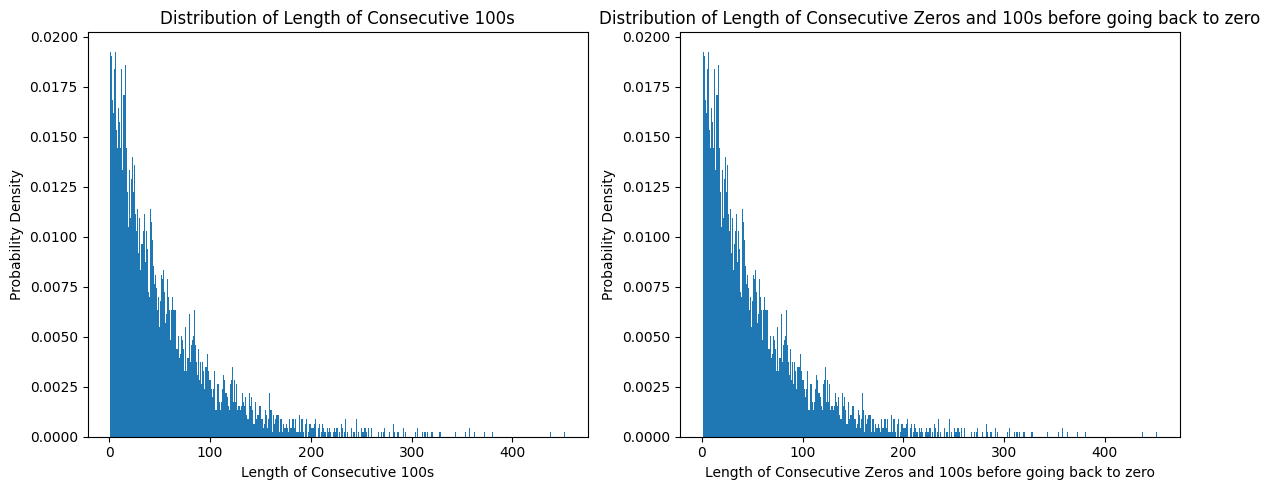

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the file
data = np.loadtxt('enh_num_20_time_AC_test1.txt')

# Extract the columns
time = data[:, 0]
AC = data[:, 1]

# Initialize lists to store lengths of consecutive 100s and lengths of consecutive zeros and 100s before transitioning back to zero
consecutive_100_lengths = []
consecutive_zeros_and_100s_lengths = []

# Initialize variables to track lengths
current_consecutive_100_length = 0
current_zeros_and_100s_length = 0

# Iterate over the data to calculate lengths
for i in range(len(AC)):
    if AC[i] == 100:
        current_consecutive_100_length += 1
        current_zeros_and_100s_length += 1
    else:
        if current_consecutive_100_length > 0:
            consecutive_100_lengths.append(current_consecutive_100_length)
            current_consecutive_100_length = 0

        if current_zeros_and_100s_length > 0:
            consecutive_zeros_and_100s_lengths.append(current_zeros_and_100s_length)
        current_zeros_and_100s_length = 0

# Plot the distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(consecutive_100_lengths, bins=np.arange(1, max(consecutive_100_lengths) + 2), density=True)
plt.xlabel('Length of Consecutive 100s')
plt.ylabel('Probability Density')
plt.title('Distribution of Length of Consecutive 100s')

plt.subplot(1, 2, 2)
plt.hist(consecutive_zeros_and_100s_lengths, bins=np.arange(1, max(consecutive_zeros_and_100s_lengths) + 2), density=True)
plt.xlabel('Length of Consecutive Zeros and 100s before going back to zero')
plt.ylabel('Probability Density')
plt.title('Distribution of Length of Consecutive Zeros and 100s before going back to zero')

plt.tight_layout()
plt.show()


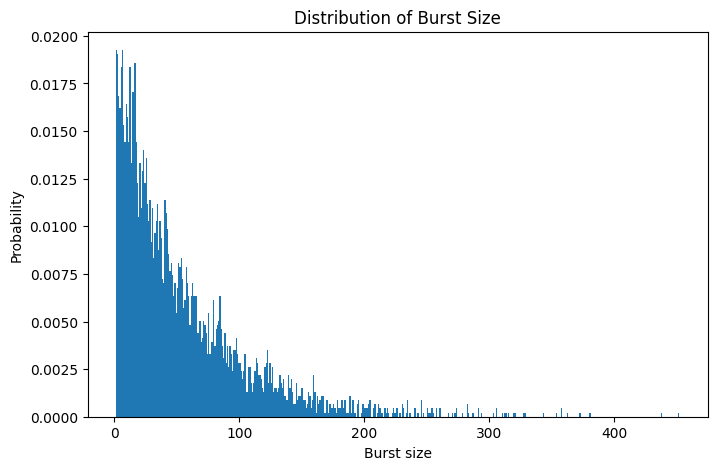

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the file
data = np.loadtxt('enh_num_20_time_AC_test1.txt')

# Extract the columns
time = data[:, 0]
AC = data[:, 1]

# Initialize lists to store lengths of consecutive 100s
consecutive_100_lengths = []

# Initialize variables to track lengths
current_consecutive_100_length = 0

# Iterate over the data to calculate lengths
for i in range(len(AC)):
    if AC[i] == 100:
        current_consecutive_100_length += 1
    else:
        if current_consecutive_100_length > 0:
            consecutive_100_lengths.append(current_consecutive_100_length)
        current_consecutive_100_length = 0

# Plot the distribution of lengths of consecutive 100s
plt.figure(figsize=(8, 5))
plt.hist(consecutive_100_lengths, bins=np.arange(1, max(consecutive_100_lengths) + 2), density=True)
plt.xlabel('Burst size')
plt.ylabel('Probability')
plt.title('Distribution of Burst Size')
plt.show()


In [1301]:
import pandas as pd
df1=pd.read_csv('enh_num_20_s1_0.99_s2_1.01_ma_mr_1.5_AC_100_t1.txt',header=None,sep='\s+')
df1.columns = ['key1','AC1','Avg_cluster']

In [72]:
import pandas as pd

# Initialize an empty list to store DataFrames
df_list = []

# Loop through file indices from 1 to 15
for i in range(1, 41):  # Adjust range as needed
    # Generate the filename
    filename = f'enh_num_20_s1_0.95_s2_1.01_ma_1.5_mr_10.5_AC_100_t{i}.txt'
    
    # Read the file into a DataFrame
    df = pd.read_csv(filename, header=None, sep='\s+')
    df.columns = [f'key{i}', f'AC{i}', f'Cluster{i}']
    
    # Append the DataFrame to the list
    df_list.append(df)

# Concatenate all DataFrames in the list along the index axis
concatenated_df = pd.concat(df_list, axis=1)

# Find the index where the transition occurs (0 to 100) in the first AC column
transition_index = concatenated_df[concatenated_df.iloc[:, 1] == 100].index[0]

# Calculate start index for the clipping window
start_index = max(transition_index - 10, 0)

# Find the index of the first maximum value in the 'Avg_cluster' column
cluster_columns = [col for col in concatenated_df.columns if 'Cluster' in col]
concatenated_df['Avg_cluster'] = concatenated_df[cluster_columns].mean(axis=1)
# max_cluster = concatenated_df['Avg_cluster'].max() - 2
post_transition_avg_cluster = concatenated_df['Avg_cluster'].iloc[transition_index:]
max_cluster = post_transition_avg_cluster.max() - 2
# Find the index where Avg_cluster reaches max_cluster
max_index = concatenated_df[concatenated_df['Avg_cluster'] >= max_cluster].index[0]

# Clip the dataframe based on start and max indices
clipped_df = concatenated_df.iloc[start_index:max_index + 1].reset_index(drop=True)

# Save the final DataFrame to a file, if needed
clipped_df.to_csv('concatenated_output.csv', index=False)

# Print the final DataFrame
clipped_df_to_print = clipped_df[['key1', 'AC1', 'Avg_cluster']]
print(clipped_df_to_print)


            key1    AC1  Avg_cluster
0    5533.805627    0.0        3.125
1    5533.979140    0.0        2.775
2    5534.217958    0.0        2.975
3    5534.233483    0.0        2.825
4    5534.271604    0.0        2.975
..           ...    ...          ...
146  5550.233290  100.0       16.175
147  5550.241457  100.0       16.275
148  5550.963624  100.0       16.500
149  5551.101539  100.0       16.500
150  5551.588275  100.0       16.575

[151 rows x 3 columns]


# only key1 subtracted df

In [114]:
import pandas as pd

# Initialize an empty list to store DataFrames
df_list = []

# Loop through file indices from 1 to 40
for i in range(1, 41):  # Adjust range as needed
    # Generate the filename
    filename = f'enh_num_20_s1_0.95_s2_1.01_ma_1.5_mr_20.5_AC_100_t{i}.txt'
    
    # Read the file into a DataFrame
    df = pd.read_csv(filename, header=None, sep='\s+')
    df.columns = [f'key{i}', f'AC{i}', f'Cluster{i}']
    
    # Append the DataFrame to the list
    df_list.append(df)

# Concatenate all DataFrames in the list along the index axis
concatenated_df = pd.concat(df_list, axis=1)

# Find the index where the transition occurs (0 to 100) in the first AC column
transition_index = concatenated_df[concatenated_df.iloc[:, 1] == 100].index[0]

# Calculate start index for the clipping window
start_index = max(transition_index - 10, 0)

# Find the index of the first maximum value in the 'Avg_cluster' column
cluster_columns = [col for col in concatenated_df.columns if 'Cluster' in col]
concatenated_df['Avg_cluster'] = concatenated_df[cluster_columns].mean(axis=1)
post_transition_avg_cluster = concatenated_df['Avg_cluster'].iloc[transition_index:]
max_cluster = post_transition_avg_cluster.max() - 2

# Find the index where Avg_cluster reaches max_cluster
max_index = concatenated_df[concatenated_df['Avg_cluster'] >= max_cluster].index[0]

# Clip the dataframe based on start and max indices
clipped_df = concatenated_df.iloc[start_index:max_index + 1].reset_index(drop=True)

# Convert key1 to key1 - key1 of transition point
key1_transition_value = clipped_df.at[transition_index - start_index, 'key1']
clipped_df['key1'] = clipped_df['key1'] - key1_transition_value

# Save the final DataFrame to a file, if needed
clipped_df.to_csv('concatenated_output.csv', index=False)

# Print the final DataFrame
clipped_df_to_print = clipped_df[['key1', 'AC1', 'Avg_cluster']]
print(clipped_df_to_print)


          key1    AC1  Avg_cluster
0    -1.027668    0.0        3.125
1    -0.854155    0.0        2.775
2    -0.615337    0.0        2.975
3    -0.599812    0.0        2.825
4    -0.561691    0.0        2.975
..         ...    ...          ...
146  15.399995  100.0       16.175
147  15.408162  100.0       16.275
148  16.130329  100.0       16.500
149  16.268244  100.0       16.500
150  16.754980  100.0       16.575

[151 rows x 3 columns]


In [2]:
import pandas as pd
df1=pd.read_csv('enh_num_2_r_1.0_g_5.0_s1_0.950_s2_1.010_ma_1.1_mr_100.5_AC_100_t1.txt',sep='\s+',header=None)
m1=df1[2].mean()
df2=pd.read_csv('enh_num_2_r_5.0_g_1.0_s1_0.950_s2_1.010_ma_1.1_mr_100.5_AC_100_t1.txt',sep='\s+',header=None)
m2=df2[2].mean()
df3=pd.read_csv('enh_num_2_r_3.0_g_2.0_s1_0.950_s2_1.010_ma_1.1_mr_100.5_AC_100_t1.txt',sep='\s+',header=None)
m3=df3[2].mean()
# df=pd.read_csv('enh_num_2_r_1.0_g_5.0_s1_0.950_s2_1.010_ma_1.1_mr_100.5_AC_100_t1.txt',sep='\s+',header=None)
# m=df[2].mean()
m1,m2,m3

(1.5, 1.5, 1.5)

# All keys subtracted df

In [288]:
import pandas as pd

# Initialize an empty list to store DataFrames
df_list = []

# Loop through file indices from 1 to 40
for i in range(1, 41):  # Adjust range as needed
    # Generate the filename
    filename = f'enh_num_20_s1_0.99_s2_0.89_ma_20.5_mr_20.5_AC_100_t{i}.txt'
    
    # Read the file into a DataFrame
    df = pd.read_csv(filename, header=None, sep='\s+')
    df.columns = [f'key{i}', f'AC{i}', f'Cluster{i}']
    
    # Append the DataFrame to the list
    df_list.append(df)

# Concatenate all DataFrames in the list along the index axis
concatenated_df = pd.concat(df_list, axis=1)

# Find the index where the transition occurs (0 to 100) in the first AC column
transition_index = concatenated_df[concatenated_df.iloc[:, 1] == 100].index[0]

# Calculate start index for the clipping window
start_index = max(transition_index - 10, 0)

# Find the index of the first maximum value in the 'Avg_cluster' column
cluster_columns = [col for col in concatenated_df.columns if 'Cluster' in col]
concatenated_df['Avg_cluster'] = concatenated_df[cluster_columns].mean(axis=1)
post_transition_avg_cluster = concatenated_df['Avg_cluster'].iloc[transition_index:]
max_cluster = post_transition_avg_cluster.max() - 1

# Find the index where Avg_cluster reaches max_cluster
max_index = concatenated_df[concatenated_df['Avg_cluster'] >= max_cluster].index[0]

# Clip the dataframe based on start and max indices
clipped_df = concatenated_df.iloc[start_index:max_index + 1].reset_index(drop=True)

# Subtract each key column by its respective transition point key value
key_columns = [col for col in clipped_df.columns if 'key' in col]
for key_col in key_columns:
    key_transition_value = concatenated_df.at[transition_index, key_col]
    clipped_df[key_col] = clipped_df[key_col] - key_transition_value

# Save the final DataFrame to a file, if needed
clipped_df.to_csv('concatenated_output.csv', index=False)

# Print the final DataFrame with the first key, AC, and Avg_cluster columns
clipped_df_to_print = clipped_df[['key1', 'AC1', 'Avg_cluster']]
print(clipped_df_to_print)


        key1    AC1  Avg_cluster
0  -0.511848    0.0        2.950
1  -0.375647    0.0        2.750
2  -0.321873    0.0        3.150
3  -0.234934    0.0        2.675
4  -0.199890    0.0        3.050
5  -0.107997    0.0        2.800
6  -0.107277    0.0        3.050
7  -0.066699    0.0        2.675
8  -0.066283    0.0        2.925
9  -0.000115    0.0        2.700
10  0.000000  100.0        3.125
11  0.016713  100.0        2.750
12  0.052927  100.0        3.325
13  0.063726  100.0        3.425
14  0.078539  100.0        4.225
15  0.093420  100.0        4.550
16  0.093474  100.0        5.325
17  0.094304  100.0        5.850
18  0.098506  100.0        6.625
19  0.099117  100.0        7.350
20  0.099435  100.0        8.250
21  0.120878  100.0        9.050
22  0.123992  100.0        9.925
23  0.125302  100.0       10.700
24  0.130408  100.0       11.400
25  0.164991  100.0       12.175
26  0.168569  100.0       13.025
27  0.183052  100.0       13.850
28  0.183289  100.0       14.800
29  0.1857

In [1]:
import pandas as pd
import os

# Function to calculate the average of the third column in a file
def calculate_average(file_path):
    # Read the file into a DataFrame
    df = pd.read_csv(file_path,sep='\s+', header=None)
    # Calculate the average of the third column (index 2)
    average = df.iloc[:, 2].mean()
    return average

# Directory containing the files
directory = '/home/swayamshree/Desktop/kinetic_model/gillespie/lower_chain/'

# List to store the results
results = []

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.txt'):  # Change the extension if your files are not CSV
        file_path = os.path.join(directory, filename)
        avg = calculate_average(file_path)
        results.append((filename, avg))

# Save the results to a new file
results_df = pd.DataFrame(results, columns=['Filename', 'Average'])
results_df.to_csv('averages_lower_4.csv', index=False)

print("Averages calculated and saved to 'averages.csv'.")


Averages calculated and saved to 'averages.csv'.


In [192]:
clipped_df_to_print.to_csv('fitting_data',index=None,sep=' ')

# row_30_clipping

In [42]:
import pandas as pd

# Initialize an empty list to store DataFrames
df_list = []

# Loop through file indices from 1 to 15
for i in range(1, 41):  # Adjust range as needed
    # Generate the filename
    filename = f'enh_num_20_r_5.0_g_2.0_s1_0.950_s2_1.010_ma_1.1_mr_1.1_AC_100_t{i}.txt'
    
    # Read the file into a DataFrame
    df = pd.read_csv(filename, header=None, sep='\s+')
    df.columns = [f'key{i}', f'AC{i}', f'Cluster{i}']
    
    # Append the DataFrame to the list
    df_list.append(df)

# Concatenate all DataFrames in the list along the index axis
concatenated_df = pd.concat(df_list, axis=1)

# Find the index where the transition occurs (0 to 100) in the first AC column
transition_index = concatenated_df[concatenated_df.iloc[:, 1] == 100].index[0]

# Calculate start index for the clipping window
start_index = max(transition_index - 10, 0)

# Find the index of the first maximum value in the 'Avg_cluster' column
cluster_columns = [col for col in concatenated_df.columns if 'Cluster' in col]
concatenated_df['Avg_cluster'] = concatenated_df[cluster_columns].mean(axis=1)
# max_cluster = concatenated_df['Avg_cluster'].max() - 2
post_transition_avg_cluster = concatenated_df['Avg_cluster'].iloc[transition_index:]
max_cluster = post_transition_avg_cluster.max() - 2
# Find the index where Avg_cluster reaches max_cluster
# max_index = concatenated_df[concatenated_df['Avg_cluster'] >= max_cluster].index[0]
max_index = min(transition_index + 30, len(df))
# Clip the dataframe based on start and max indices
clipped_df = concatenated_df.iloc[start_index:max_index + 1].reset_index(drop=True)

# Save the final DataFrame to a file, if needed
clipped_df.to_csv('concatenated_output.csv', index=False)

# Print the final DataFrame
clipped_df_to_print = clipped_df[['key3', 'AC3', 'Avg_cluster']]
# print(clipped_df_to_print)


# Noise

In [31]:
import pandas as pd
import numpy as np  # Import numpy for mean calculations

# Initialize lists to store means and standard deviations
means = []
std_devs = []

for i in range(1, 81):  # Adjust range as needed
    # Generate the filename
    filename = f'enh_num_51_r_5.0_g_1.0_s1_0.950_s2_1.010_ma_5.5_mr_5.5_AC_100_RC_100_t{i}.txt'
    
    # Read the data
    df = pd.read_csv(filename, header=None, sep='\s+')
    df.columns = [f'key{i}', f'AC{i}', f'Cluster{i}']
    
    # Filter the rows where AC column equals 0
    filtered_df = df[df[f'AC{i}'] == 0]
    
    # Calculate mean and standard deviation of the Cluster column
    mean_cluster = filtered_df[f'Cluster{i}'].mean()
    std_cluster = filtered_df[f'Cluster{i}'].std()
    
    # Store the results
    means.append(mean_cluster)
    std_devs.append(std_cluster)
    
    # Print the results for each file
    noise = std_cluster / mean_cluster if mean_cluster != 0 else None
#     print(f"File {i}: Mean = {mean_cluster}, Std = {std_cluster}, Noise = {noise}")

# Calculate and print overall means and standard deviations at the end
overall_mean = np.mean(means)
overall_std_dev = np.mean(std_devs)
overall_noise=overall_std_dev/overall_mean
print(f"Overall Mean of Means: {overall_mean}")
print(f"Overall Mean of Standard Deviations: {overall_std_dev}")
print(f"Overall Mean of noise: {overall_noise}")



Overall Mean of Means: 3.4738440231195375
Overall Mean of Standard Deviations: 2.1131434372295006
Overall Mean of noise: 0.6083011854204905


In [43]:
# concatenated_df = concatenated_df[concatenated_df['AC1'] == 100.0]

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'concatenated_df' is your DataFrame
# Selecting only the cluster columns
cluster_columns = [f'Cluster{i}' for i in range(1, 41)]
clusters_df = concatenated_df[cluster_columns]

# Merging all the cluster columns into a single column
merged_clusters = clusters_df.melt(value_name='MergedClusters').dropna()['MergedClusters']
# clusters_df
ke = merged_clusters.value_counts(normalize=True).sort_index()
# Plotting the distribution of the merged column
# plt.figure(figsize=(10, 6))
# sns.histplot(merged_clusters, kde=True, bins=30)  # KDE for smooth distribution curve
# plt.title('Distribution of Merged Clusters')
# plt.xlabel('Values')
# plt.ylabel('Frequency')
# plt.show()
# Convert 'ke' Series to a DataFrame with columns 'cl' and 'prob'
ke_df = ke.reset_index()
ke_df.columns = ['cl', 'prob']

# Save the DataFrame to a text file with space as the separator
ke_df.to_csv('TF_coop_whole_enh_num_20_r_5.0_g_2.0_s1_0.950_s2_1.010_ma_1.1_mr_1.1_AC_100.txt', header=True, sep=' ', index=False)


In [43]:
df1=pd.read_csv('whole_enh_num_20_r_5.0_g_1.0_s1_0.950_s2_1.010_ma_5.5_mr_5.5_AC_100.txt',sep=' ')
df2=pd.read_csv('whole_enh_num_20_r_5.0_g_2.0_s1_0.950_s2_1.010_ma_5.5_mr_5.5_AC_100.txt',sep='\s+')
df3=pd.read_csv('whole_enh_num_20_r_5.0_g_3.0_s1_0.950_s2_1.010_ma_5.5_mr_5.5_AC_100.txt',sep='\s+')
df4=pd.read_csv('whole_enh_num_20_r_5.0_g_4.0_s1_0.950_s2_1.010_ma_5.5_mr_5.5_AC_100.txt',sep='\s+')
df5=pd.read_csv('whole_enh_num_20_r_5.0_g_5.0_s1_0.950_s2_1.010_ma_5.5_mr_5.5_AC_100.txt',sep='\s+')
df1

,cl,prob
0,0,0.000000
1,1,0.052192
2,2,0.090189
3,3,0.082632
4,4,0.071967
5,5,0.059485
6,6,0.046490
7,7,0.034523
8,8,0.024442
9,9,0.016605


In [4]:
import pandas as pd
df1=pd.read_csv('TF_coop_whole_enh_num_20_r_5.0_g_1.0_s1_0.950_s2_1.010_ma_1.1_mr_1.1_AC_100.txt',sep=' ')
df2=pd.read_csv('TF_coop_whole_enh_num_20_r_5.0_g_1.0_s1_0.950_s2_1.010_ma_1.1_mr_5.5_AC_100.txt',sep=' ')
df3=pd.read_csv('TF_coop_whole_enh_num_20_r_5.0_g_1.0_s1_0.950_s2_1.010_ma_1.1_mr_10.5_AC_100.txt',sep=' ')
df4=pd.read_csv('TF_coop_whole_enh_num_20_r_5.0_g_1.0_s1_0.950_s2_1.010_ma_1.1_mr_100.5_AC_100.txt',sep=' ')
df5=pd.read_csv('TF_coop_whole_enh_num_20_r_5.0_g_1.0_s1_0.950_s2_1.010_ma_5.5_mr_1.1_AC_100.txt',sep=' ')
df6=pd.read_csv('TF_coop_whole_enh_num_20_r_5.0_g_1.0_s1_0.950_s2_1.010_ma_5.5_mr_5.5_AC_100.txt',sep=' ')
df7=pd.read_csv('TF_coop_whole_enh_num_20_r_5.0_g_1.0_s1_0.950_s2_1.010_ma_5.5_mr_10.5_AC_100.txt',sep=' ')
df8=pd.read_csv('TF_coop_whole_enh_num_20_r_5.0_g_1.0_s1_0.950_s2_1.010_ma_5.5_mr_100.5_AC_100.txt',sep=' ')
df9=pd.read_csv('TF_coop_whole_enh_num_20_r_5.0_g_1.0_s1_0.950_s2_1.010_ma_10.5_mr_1.1_AC_100.txt',sep=' ')
df10=pd.read_csv('TF_coop_whole_enh_num_20_r_5.0_g_1.0_s1_0.950_s2_1.010_ma_10.5_mr_5.5_AC_100.txt',sep=' ')
df11=pd.read_csv('TF_coop_whole_enh_num_20_r_5.0_g_1.0_s1_0.950_s2_1.010_ma_10.5_mr_10.5_AC_100.txt',sep=' ')
df12=pd.read_csv('TF_coop_whole_enh_num_20_r_5.0_g_1.0_s1_0.950_s2_1.010_ma_10.5_mr_100.5_AC_100.txt',sep=' ')
df13=pd.read_csv('TF_coop_whole_enh_num_20_r_5.0_g_1.0_s1_0.950_s2_1.010_ma_100.5_mr_1.1_AC_100.txt',sep=' ')
df14=pd.read_csv('TF_coop_whole_enh_num_20_r_5.0_g_1.0_s1_0.950_s2_1.010_ma_100.5_mr_5.5_AC_100.txt',sep=' ')
df15=pd.read_csv('TF_coop_whole_enh_num_20_r_5.0_g_1.0_s1_0.950_s2_1.010_ma_100.5_mr_10.5_AC_100.txt',sep=' ')
df16=pd.read_csv('TF_coop_whole_enh_num_20_r_5.0_g_1.0_s1_0.950_s2_1.010_ma_100.5_mr_100.5_AC_100.txt',sep=' ')
df1

,cl,prob
0,0,0.000000
1,1,0.000022
2,2,0.000027
3,3,0.000021
4,4,0.000027
5,5,0.000023
6,6,0.000030
7,7,0.000046
8,8,0.000081
9,9,0.000199


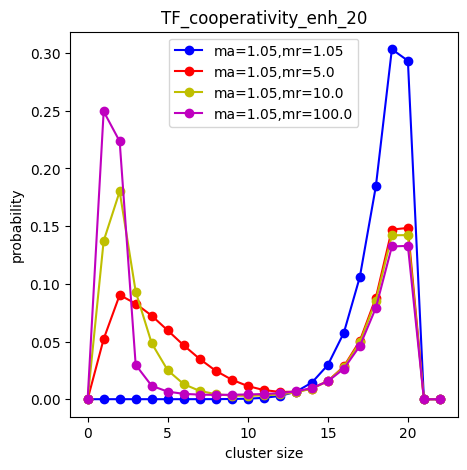

In [7]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(5,5))
plt.plot(df1.cl,df1.prob,'b-o',label='ma=1.05,mr=1.05')
plt.plot(df2.cl,df2.prob,'r-o',label='ma=1.05,mr=5.0')
plt.plot(df3.cl,df3.prob,'y-o',label='ma=1.05,mr=10.0')
plt.plot(df4.cl,df4.prob,'m-o',label='ma=1.05,mr=100.0')
# plt.plot(df5.cl,df5.prob,'k-o',label='r=5,g=5')
plt.legend()
plt.xlabel('cluster size')
plt.ylabel('probability')
plt.title('TF_cooperativity_enh_20')
plt.savefig('mr_ma_100.1.png')
plt.show()

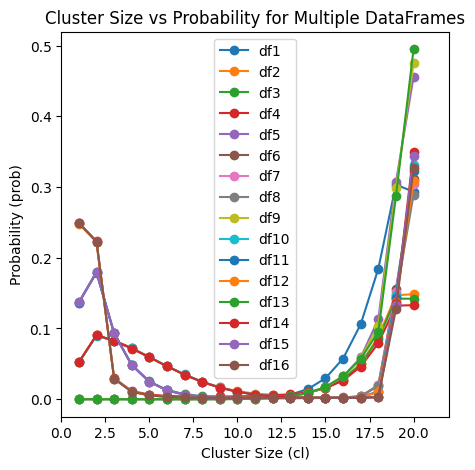

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# List of dataframes
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16]

# Plotting each dataframe
plt.figure(figsize=(5, 5))

for i, df in enumerate(dfs, start=1):
    # Set prob to zero before minimum cluster size and after cluster 20
    min_cl = df['cl'].min()
    df['prob_modified'] = df['prob'].where((df['cl'] >= min_cl) & (df['cl'] <= 20), 0)
    # Plotting
    if 21 in df['cl'].values:
        df.loc[df['cl'] == 21, 'prob_modified'] = 0
    if 22 in df['cl'].values:
        df.loc[df['cl'] == 22, 'prob_modified'] = 0
    plt.plot(df['cl'], df['prob_modified'], label=f'df{i}', marker='o')

# Adding labels and legend
plt.xlim(0, 22)
plt.xlabel('Cluster Size (cl)')
plt.ylabel('Probability (prob)')
plt.title('Cluster Size vs Probability for Multiple DataFrames')
plt.legend()
# plt.grid(True)
plt.show()


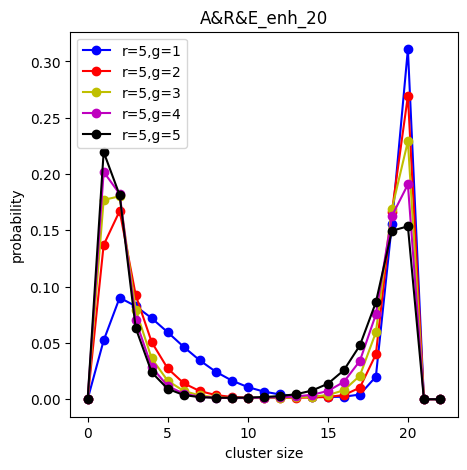

In [45]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(5,5))
plt.plot(df1.cl,df1.prob,'b-o',label='r=5,g=1')
plt.plot(df2.cl,df2.prob,'r-o',label='r=5,g=2')
plt.plot(df3.cl,df3.prob,'y-o',label='r=5,g=3')
plt.plot(df4.cl,df4.prob,'m-o',label='r=5,g=4')
plt.plot(df5.cl,df5.prob,'k-o',label='r=5,g=5')
plt.legend()
plt.xlabel('cluster size')
plt.ylabel('probability')
plt.title('A&R&E_enh_20')
plt.savefig('ARE.png')
plt.show()

In [285]:
for i in range(1, 21):
    key_column = f'key{i}'
    if key_column in clipped_df.columns:
        m = clipped_df[key_column].iloc[0] - clipped_df[key_column].iloc[-1]
        print(f"Difference for {key_column}: {m}")
    else:
        print(f"{key_column} does not exist in the dataframe.")

Difference for key1: -2.4887259999995877
Difference for key2: -7.00372999999945
Difference for key3: -4.117865999999594
Difference for key4: -5.979634999999689
Difference for key5: -4.118844999999965
Difference for key6: -8.078466999999364
Difference for key7: -7.088673999999628
Difference for key8: -5.026090999999724
Difference for key9: -1.9531429999997272
Difference for key10: -4.1849169999995866
Difference for key11: -5.824298999999883
Difference for key12: -4.6693450000002485
Difference for key13: -7.003560000000107
Difference for key14: -3.538969000000179
Difference for key15: -3.1919150000003356
Difference for key16: -3.879681999999775
Difference for key17: -2.9306839999999283
Difference for key18: -3.5400799999997616
Difference for key19: -5.092544999999518
Difference for key20: -4.015194999999949


In [1196]:
# # Find the index where the transition occurs (0 to 100)
# transition_index = df1[df1['AC'] == 100].index[0]

# # Calculate start and end indices for the 50-row window
# start_index = max(transition_index - 25, 0)
# end_index = min(transition_index + 25, len(df))

# # Clip 50 rows around the transition point
# clipped_df1 = df1.iloc[start_index:end_index]


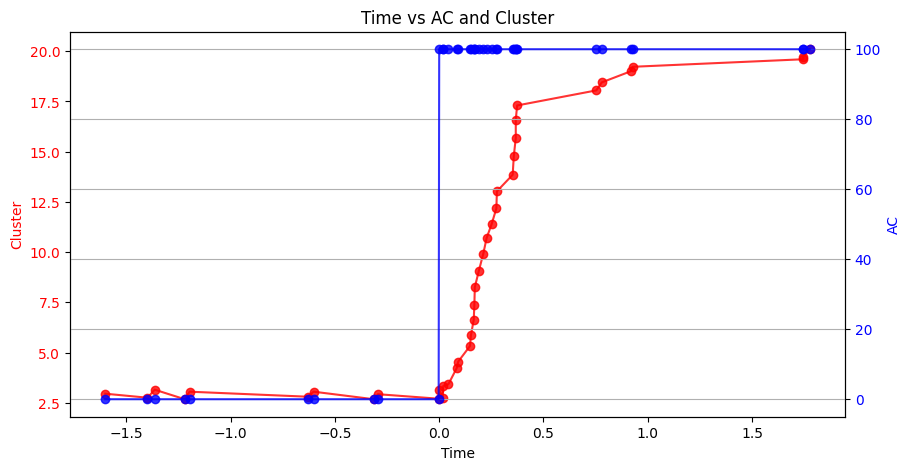

In [289]:
import matplotlib.pyplot as plt
df3 = clipped_df
# df3 = df1.iloc[1:100000]
# Create the figure and the first axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot the first dataset
ax1.plot(df3['key3'], df3['Avg_cluster'], 'r-o', alpha=0.8)
ax1.set_xlabel('Time')
ax1.set_ylabel('Cluster', color='r')
ax1.tick_params(axis='y', labelcolor='r')
# ax1.ylim(0,22)

# Create the second axis, sharing the same x-axis
ax2 = ax1.twinx()

# Plot the second dataset
ax2.plot(df3['key3'], df3['AC3'], 'b-o', alpha=0.8)
ax2.set_ylabel('AC', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Show the plot
plt.title('Time vs AC and Cluster')
plt.grid(True)
plt.show()

# exponential fitting

Optimal parameters: a=21.1736930355899, b=5.264620256365743,c=20.614346683280072


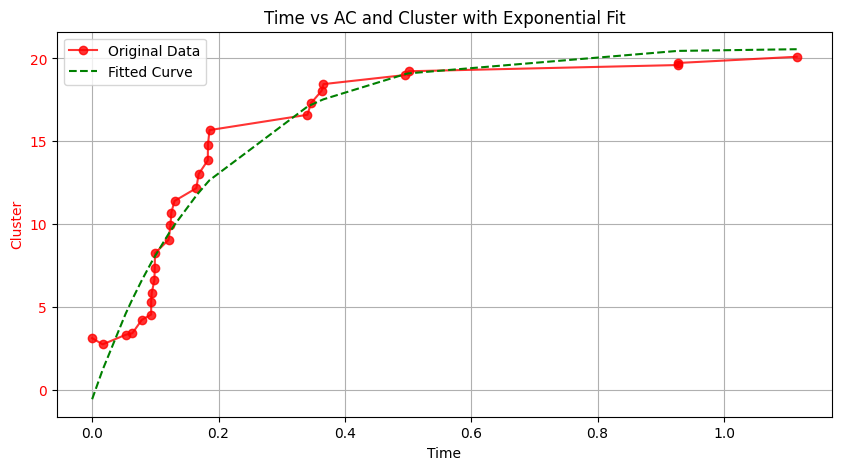

response time=0.18994722340910436


In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming df3 is already defined
df3 = clipped_df.iloc[10:]

# Define the exponential function
def exponential_func(x, a, b,c):
    return c - a*np.exp(-b*x)

# Extract the data for fitting
x_data = df3['key1'].values
y_data = df3['Avg_cluster'].values 

# Normalize x_data
#x_data_normalized = x_data - np.min(x_data)

# Provide initial guesses for parameters a and b


# Use curve_fit to fit the exponential function to the normalized data
popt, pcov = curve_fit(exponential_func, x_data, y_data)

# Get the optimal parameters
a, b,c = popt
print(f"Optimal parameters: a={a}, b={b},c={c}")

# Generate y values based on the fit
y_fit = exponential_func(x_data, *popt)

# Create the figure and the first axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot the original dataset
ax1.plot(x_data, y_data, 'r-o', alpha=0.8, label='Original Data')
ax1.set_xlabel('Time')
ax1.set_ylabel('Cluster', color='r')
ax1.tick_params(axis='y', labelcolor='r')
# ax1.set_ylim(2, 16.5)

# Plot the fitted exponential curve
ax1.plot(x_data, y_fit, 'g--', label='Fitted Curve')
ax1.legend()

# Create the second axis, sharing the same x-axis
# ax2 = ax1.twinx()

# Plot the second dataset
# ax2.plot(df3['key1'], df3['AC1'], 'b-o', alpha=0.8)
# ax2.set_ylabel('AC', color='b')
# ax2.tick_params(axis='y', labelcolor='b')

# Show the plot
plt.title('Time vs AC and Cluster with Exponential Fit')
plt.grid(True)
plt.show()
print(f"response time={1/b}")

# sigmoid_fitting

[ 41.99078188  -2.57450547   0.24821853 -25.86081281]


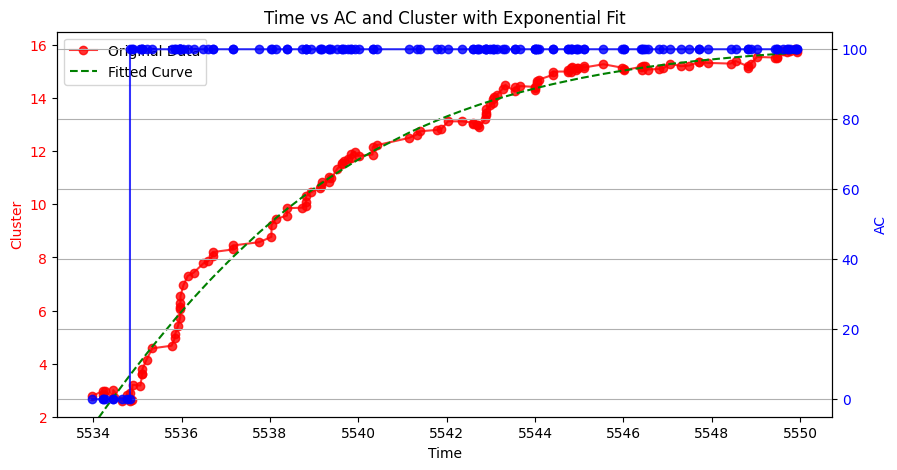

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming df3 is already defined
df3 = clipped_df.iloc[1:-7]

# Define the exponential function
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# Extract the data for fitting
x_data = df3['key1'].values
y_data = df3['Avg_cluster'].values

# Normalize x_data
x_data_normalized = x_data - np.min(x_data)
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

p0 = [max(y_data), np.median(x_data_normalized),1,min(y_data)] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, x_data_normalized, y_data,p0, method='dogbox')
y_fit = sigmoid(x_data_normalized, *popt)
print(popt)
# Create the figure and the first axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot the original dataset
ax1.plot(x_data, y_data, 'r-o', alpha=0.8, label='Original Data')
ax1.set_xlabel('Time')
ax1.set_ylabel('Cluster', color='r')
ax1.tick_params(axis='y', labelcolor='r')
ax1.set_ylim(2, 16.5)

# Plot the fitted exponential curve
ax1.plot(x_data, y_fit, 'g--', label='Fitted Curve')
ax1.legend()

# Create the second axis, sharing the same x-axis
ax2 = ax1.twinx()

# Plot the second dataset
ax2.plot(df3['key1'], df3['AC1'], 'b-o', alpha=0.8)
ax2.set_ylabel('AC', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Show the plot
plt.title('Time vs AC and Cluster with Exponential Fit')
plt.grid(True)
plt.show()

# Response time linear regression plot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [4]:
# #response time with m 
# df=pd.read_csv('tau_with_m',sep='\s+')
# df

In [5]:
df=pd.read_csv('enh_no_with_avg_cl_lower',sep='\s+')
df

,enh_no,avg_cl_r_5_g_1,avg_cl_r_1_g_5,avg_cl_r_3_g_2
0,1,0.51,0.29,0.43
1,5,3.24,1.41,2.04
2,10,4.23,1.41,2.05
3,20,4.39,1.41,2.06
4,30,4.41,1.41,2.07
5,40,4.48,1.41,2.08
6,50,4.48,1.41,2.08


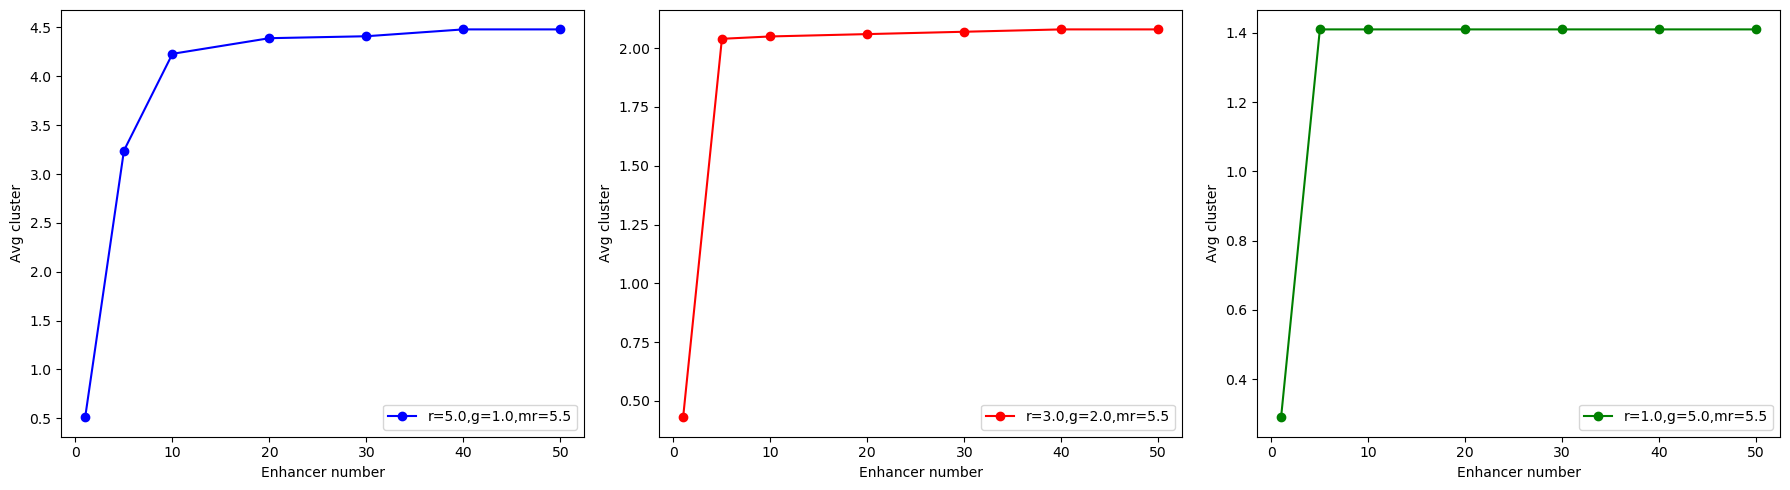

In [7]:
import matplotlib.pyplot as plt
def linear(x, a, b):
    return a * x + b

# Extracting the data
x = df['enh_no']
y1 = df['avg_cl_r_5_g_1']
y2 = df['avg_cl_r_3_g_2']
y3 = df['avg_cl_r_1_g_5']

# Perform curve fitting
# popt1, pcov1 = curve_fit(linear, x, y1)
# popt2, pcov2 = curve_fit(linear, x, y2)
# popt3, pcov3 = curve_fit(linear, x, y3)

# Plotting the data and the fitted curves
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for t1
axes[0].plot(x, y1, 'b-o',label='r=5.0,g=1.0,mr=5.5')
# axes[0].plot(x, linear(x, *popt1), color='red', label=f'y={popt1[0]:.2f}x+{popt1[1]:.2f}')
axes[0].set_xlabel('Enhancer number')
axes[0].set_ylabel('Avg cluster')
axes[0].legend()
# axes[0].set_title('Data and Fitted Curve for t1')

# Plot for t2
axes[1].plot(x, y2,'r-o', label='r=3.0,g=2.0,mr=5.5')
# axes[1].plot(x, linear(x, *popt2), color='red', label=f'y={popt2[0]:.2f}x+{popt2[1]:.2f}')
axes[1].set_xlabel('Enhancer number')
axes[1].set_ylabel('Avg cluster')
axes[1].legend()
# axes[1].set_title('Data and Fitted Curve for t2')

# Plot for t3
axes[2].plot(x, y3,'g-o', label='r=1.0,g=5.0,mr=5.5')
# axes[2].plot(x, linear(x, *popt3), color='red', label=f'y={popt3[0]:.2f}x+{popt3[1]:.2f}')
axes[2].set_xlabel('Enhancer number')
axes[2].set_ylabel('Avg cluster')
axes[2].legend()
# axes[2].setxtick(fontsize=20)
# axes[2].set_title('Data and Fitted Curve for t3')

plt.tight_layout()
plt.show()

In [10]:
df=pd.read_csv('rg_ratio_with_abg_cl_lower',sep='\s+')
df

,rg_ratio,avg_cl_enh_1,avg_cl_enh_5,avg_cl_enh_20,avg_cl_enh_50
0,0.20,0.29,1.41,1.41,1.41
1,0.40,0.33,1.55,1.55,1.55
2,0.60,0.36,1.66,1.66,1.67
3,0.80,0.38,1.77,1.77,1.78
4,1.00,0.40,1.85,1.86,1.88
5,1.25,0.42,1.95,1.98,1.98
6,1.50,0.44,2.08,2.14,2.15
7,2.50,0.48,2.39,2.52,2.52
8,3.00,0.49,2.41,3.35,3.36
9,4.00,0.50,2.90,3.86,3.87


/opt/intel/oneapi/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/intel/oneapi/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/intel/oneapi/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


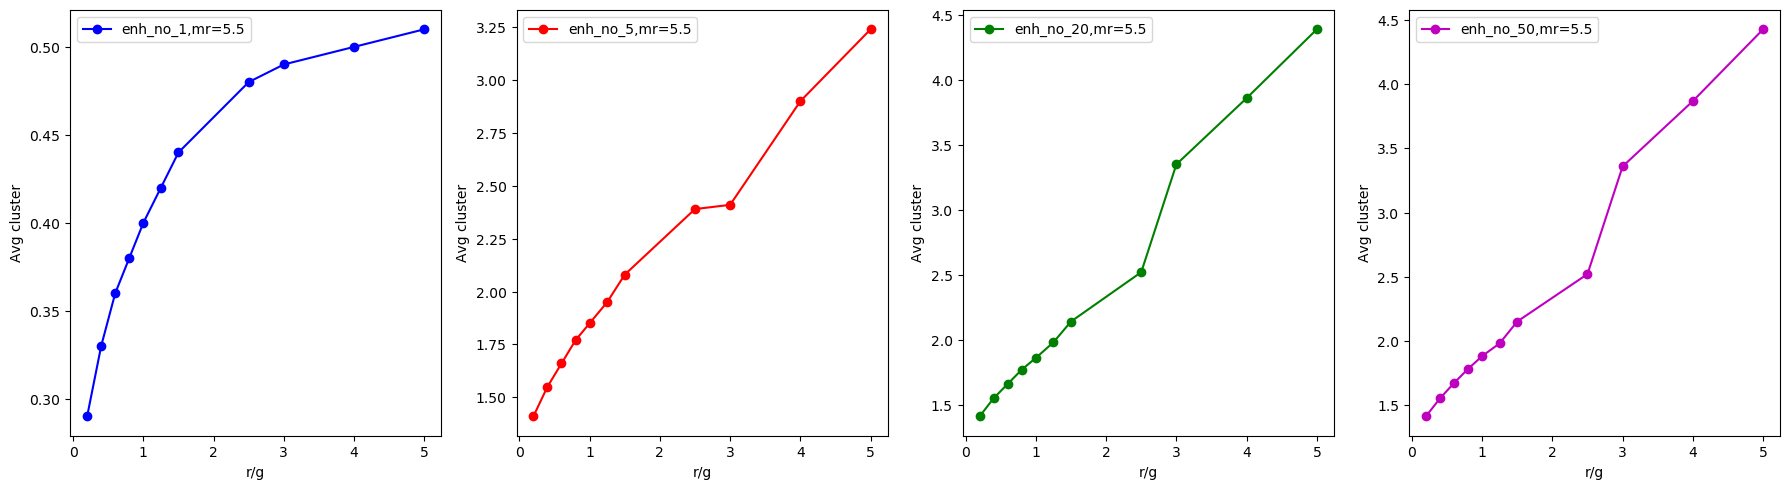

In [11]:
def linear(x, a, b):
    return a * x + b

# Extracting the data
x = df['rg_ratio']
y1 = df['avg_cl_enh_1']
y2 = df['avg_cl_enh_5']
y3 = df['avg_cl_enh_20']
y4 = df['avg_cl_enh_50']


# Perform curve fitting
# popt1, pcov1 = curve_fit(linear, x, y1)
# popt2, pcov2 = curve_fit(linear, x, y2)
# popt3, pcov3 = curve_fit(linear, x, y3)

# Plotting the data and the fitted curves
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Plot for t1
axes[0].plot(x, y1, 'b-o',label='enh_no_1,mr=5.5')
# axes[0].plot(x, linear(x, *popt1), color='red', label=f'y={popt1[0]:.2f}x+{popt1[1]:.2f}')
axes[0].set_xlabel('r/g')
axes[0].set_ylabel('Avg cluster')
axes[0].legend()
# axes[0].set_title('Data and Fitted Curve for t1')

# Plot for t2
axes[1].plot(x, y2,'r-o', label='enh_no_5,mr=5.5')
# axes[1].plot(x, linear(x, *popt2), color='red', label=f'y={popt2[0]:.2f}x+{popt2[1]:.2f}')
axes[1].set_xlabel('r/g')
axes[1].set_ylabel('Avg cluster')
axes[1].legend()
# axes[1].set_title('Data and Fitted Curve for t2')

# Plot for t3
axes[2].plot(x, y3,'g-o', label='enh_no_20,mr=5.5')
# axes[2].plot(x, linear(x, *popt3), color='red', label=f'y={popt3[0]:.2f}x+{popt3[1]:.2f}')
axes[2].set_xlabel('r/g')
axes[2].set_ylabel('Avg cluster')
axes[2].legend()
# axes[2].setxtick(fontsize=20)
# axes[2].set_title('Data and Fitted Curve for t3')
axes[3].plot(x, y4,'m-o', label='enh_no_50,mr=5.5')
# axes[2].plot(x, linear(x, *popt3), color='red', label=f'y={popt3[0]:.2f}x+{popt3[1]:.2f}')
axes[3].set_xlabel('r/g')
axes[3].set_ylabel('Avg cluster')
axes[3].legend()

plt.tight_layout()
plt.show()

In [3]:
df=pd.read_csv('mr_with_avg_cl_lower',sep='\s+')
df

,mr,r_5_g_1_enh_5,r_1_g_5_enh_10,r_3_g_2_enh_20
0,1.05,5.34,1.47,7.11
1,5.50,3.24,1.41,2.06
2,10.50,2.32,1.39,1.84
3,100.50,1.64,1.38,1.63


/opt/intel/oneapi/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/intel/oneapi/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/intel/oneapi/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


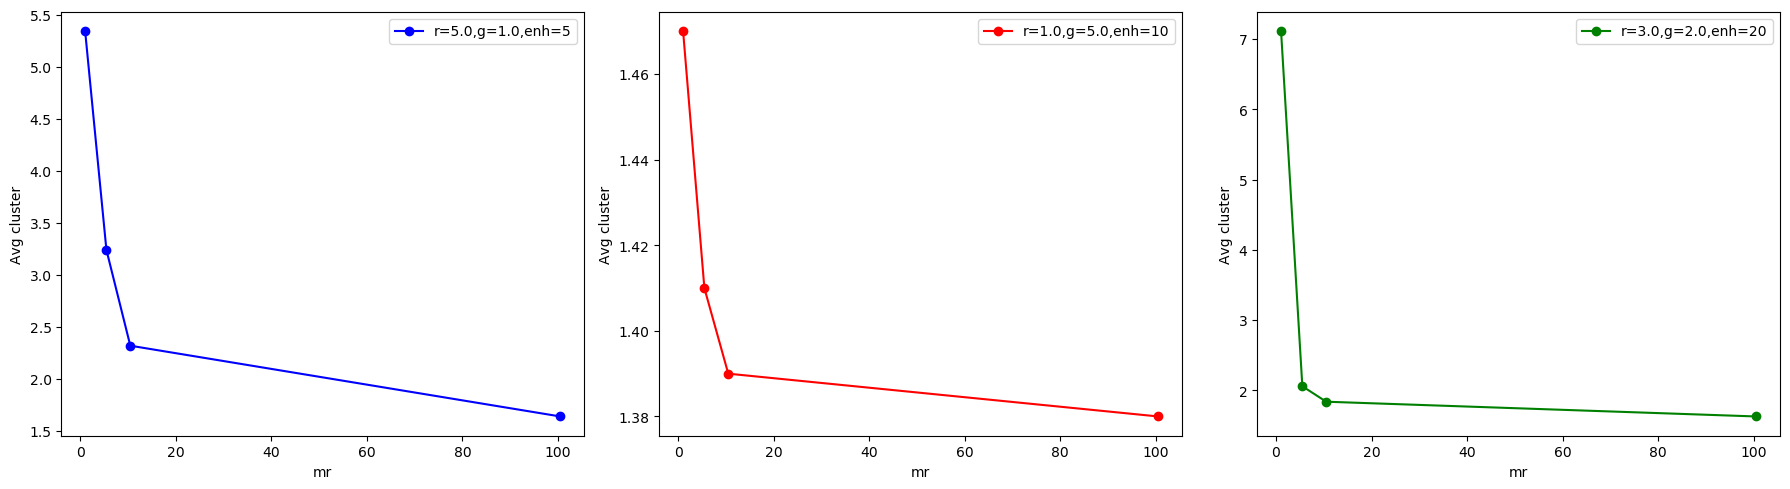

In [4]:
import matplotlib.pyplot as plt
def linear(x, a, b):
    return a * x + b

# Extracting the data
x = df['mr']
y1 = df['r_5_g_1_enh_5']
y2 = df['r_1_g_5_enh_10']
y3 = df['r_3_g_2_enh_20']

# Perform curve fitting
# popt1, pcov1 = curve_fit(linear, x, y1)
# popt2, pcov2 = curve_fit(linear, x, y2)
# popt3, pcov3 = curve_fit(linear, x, y3)

# Plotting the data and the fitted curves
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for t1
axes[0].plot(x, y1, 'b-o',label='r=5.0,g=1.0,enh=5')
# axes[0].plot(x, linear(x, *popt1), color='red', label=f'y={popt1[0]:.2f}x+{popt1[1]:.2f}')
axes[0].set_xlabel('mr')
axes[0].set_ylabel('Avg cluster')
axes[0].legend()
# axes[0].set_title('Data and Fitted Curve for t1')

# Plot for t2
axes[1].plot(x, y2,'r-o', label='r=1.0,g=5.0,enh=10')
# axes[1].plot(x, linear(x, *popt2), color='red', label=f'y={popt2[0]:.2f}x+{popt2[1]:.2f}')
axes[1].set_xlabel('mr')
axes[1].set_ylabel('Avg cluster')
axes[1].legend()
# axes[1].set_title('Data and Fitted Curve for t2')

# Plot for t3
axes[2].plot(x, y3,'g-o', label='r=3.0,g=2.0,enh=20')
# axes[2].plot(x, linear(x, *popt3), color='red', label=f'y={popt3[0]:.2f}x+{popt3[1]:.2f}')
axes[2].set_xlabel('mr')
axes[2].set_ylabel('Avg cluster')
axes[2].legend()
# axes[2].setxtick(fontsize=20)
# axes[2].set_title('Data and Fitted Curve for t3')

plt.tight_layout()
plt.show()

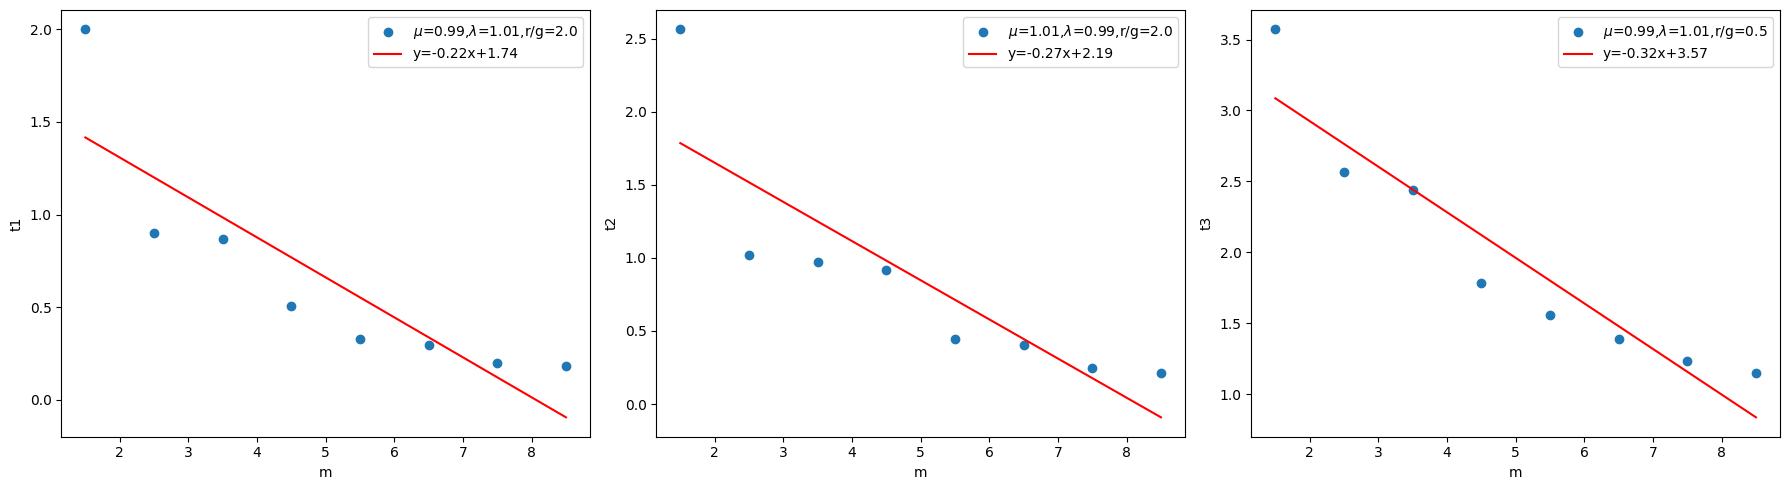

In [1150]:
def linear(x, a, b):
    return a * x + b

# Extracting the data
x = df['m']
y1 = df['t1']
y2 = df['t2']
y3 = df['t3']

# Perform curve fitting
popt1, pcov1 = curve_fit(linear, x, y1)
popt2, pcov2 = curve_fit(linear, x, y2)
popt3, pcov3 = curve_fit(linear, x, y3)

# Plotting the data and the fitted curves
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for t1
axes[0].scatter(x, y1, label='$\\mu$=0.99,$\\lambda$=1.01,r/g=2.0')
axes[0].plot(x, linear(x, *popt1), color='red', label=f'y={popt1[0]:.2f}x+{popt1[1]:.2f}')
axes[0].set_xlabel('m')
axes[0].set_ylabel('t1')
axes[0].legend()
# axes[0].set_title('Data and Fitted Curve for t1')

# Plot for t2
axes[1].scatter(x, y2, label='$\\mu$=1.01,$\\lambda$=0.99,r/g=2.0')
axes[1].plot(x, linear(x, *popt2), color='red', label=f'y={popt2[0]:.2f}x+{popt2[1]:.2f}')
axes[1].set_xlabel('m')
axes[1].set_ylabel('t2')
axes[1].legend()
# axes[1].set_title('Data and Fitted Curve for t2')

# Plot for t3
axes[2].scatter(x, y3, label='$\\mu$=0.99,$\\lambda$=1.01,r/g=0.5')
axes[2].plot(x, linear(x, *popt3), color='red', label=f'y={popt3[0]:.2f}x+{popt3[1]:.2f}')
axes[2].set_xlabel('m')
axes[2].set_ylabel('t3')
axes[2].legend()
# axes[2].set_title('Data and Fitted Curve for t3')

plt.tight_layout()
plt.show()

In [1179]:
df2=pd.read_csv('t_with_mu_competitive',sep='\s+')
df3=pd.read_csv('t_with_lambda_competitive',sep='\s+')
df4=pd.read_csv('t_with_mu_cooperative',sep='\s+')
df5=pd.read_csv('t_with_lambda_cooperative',sep='\s+')
df6=pd.read_csv('t_with_rg_ratio',sep='\s+')

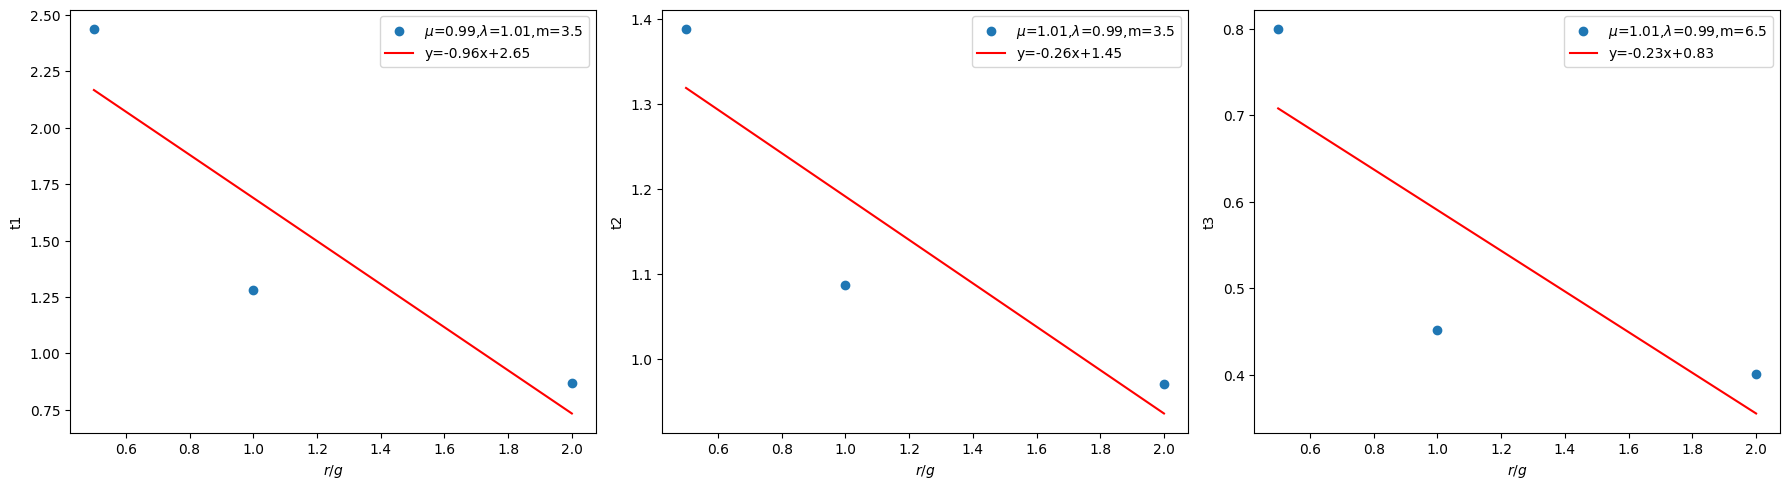

In [1181]:
def linear(x, a, b):
    return a * x + b

# Extracting the data
x = df6['rg_ratio']
y1 = df6['t1']
y2 = df6['t2']
y3 = df6['t3']

# Perform curve fitting
popt1, pcov1 = curve_fit(linear, x, y1)
popt2, pcov2 = curve_fit(linear, x, y2)
popt3, pcov3 = curve_fit(linear, x, y3)

# Plotting the data and the fitted curves
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for t1
axes[0].scatter(x, y1, label='$\\mu$=0.99,$\\lambda$=1.01,m=3.5')
axes[0].plot(x, linear(x, *popt1), color='red', label=f'y={popt1[0]:.2f}x+{popt1[1]:.2f}')
axes[0].set_xlabel('$r/g$')
axes[0].set_ylabel('t1')
axes[0].legend()
# axes[0].set_title('Data and Fitted Curve for t1')

# Plot for t2
axes[1].scatter(x, y2, label='$\\mu$=1.01,$\\lambda$=0.99,m=3.5')
axes[1].plot(x, linear(x, *popt2), color='red', label=f'y={popt2[0]:.2f}x+{popt2[1]:.2f}')
axes[1].set_xlabel('$r/g$')
axes[1].set_ylabel('t2')
axes[1].legend()
# axes[1].set_title('Data and Fitted Curve for t2')

# Plot for t3
axes[2].scatter(x, y3, label='$\\mu$=1.01,$\\lambda$=0.99,m=6.5')
axes[2].plot(x, linear(x, *popt3), color='red', label=f'y={popt3[0]:.2f}x+{popt3[1]:.2f}')
axes[2].set_xlabel('$r/g$')
axes[2].set_ylabel('t3')
axes[2].legend()
# axes[2].set_title('Data and Fitted Curve for t3')

plt.tight_layout()
plt.show()

In [1159]:
import matplotlib.pyplot as plt
plt.hist(df2[1],bins=100,density=True)
plt.show()

KeyError: 1

In [127]:
df2 = pd.read_csv('enh_num_20_time_AC_test1.txt', header=None, sep='\s+')
df2

,0,1
0,0.494367,10
1,0.505057,10
2,0.537510,10
3,0.577313,10
4,0.663362,10
...,...,...
999995,234284.500000,0
999996,234285.300000,10
999997,234285.400000,10
999998,234285.500000,10


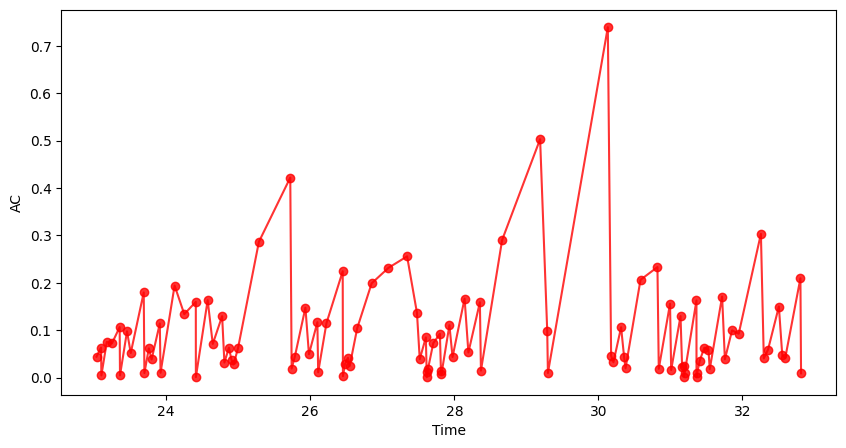

In [54]:
df2=pd.read_csv('enh_num_20_time_AC_test1.txt',header=None,sep='\s+')
df=pd.read_csv('GE_distribution_lambda_5.txt',header=None,sep=':')
df1=df.iloc[200:300]
df3=df2.iloc[200:300]
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df1[0], df1[1], 'r-o',alpha=0.8)
ax.plot(df3[0], df3[1], 'b-o',alpha=0.8)
plt.xlabel('Time')
plt.ylabel('AC')
plt.ylabel('Cluster')
# plt.title('Distribution_lambda_a_0_1')
plt.show()

In [59]:
import re
import pandas as pd

# Loop through each file
for i in range(1, 24):
    # Read data from file
    with open(f"enh_num_20_AR_s{i}.txt", "r") as file:
        lines = file.readlines()

    # Initialize variables
    step_results = {}  # Dictionary to store results for each step

    # Iterate through lines
    j = 0
    while j < len(lines):
        # Extract step number using regular expression
        step_number_match = re.match(r"Step ([\d.]+[eE][+-]?\d+):", lines[j])
        if step_number_match:
            step_number = float(step_number_match.group(1))
        else:
            # Skip this line if it doesn't match the expected format
            j += 1
            continue
        
        # Extract matrix for this step
        matrix_lines = lines[j+1:j+4]
        matrix = [[float(x) for x in line.split()] for line in matrix_lines]
     
        # Calculate expression for this step
        results = [(n-1) * matrix[0][n] + (n-1) * matrix[1][n] + (n-1) * matrix[2][n] for n in range(len(matrix[0]))]

        # Store results for this step
        step_results[step_number] = sum(results)
        
        # Move to next step
        j += 5  # Move to the next "Step X:" line (4 lines for the matrix + 1 blank line)

    # Write results to file
    with open("GE_distribution_lambda_5.txt", "w") as outfile:
        for step, result in step_results.items():
            outfile.write(f"{step}:{result}\n")

    # Read GE_distribution_lambda_5.txt int4.872o a DataFrame
    df = pd.read_csv('GE_distribution_lambda_5.txt', header=None, sep=':')
    ke = df[df.columns[1]].value_counts(normalize=True).sort_index()
    weighted_sum = sum(ke.index * ke.values)
    
    print(f"For enh_matrices_num_9_AR_{i}.txt, Weighted Sum: {weighted_sum}")


For enh_matrices_num_9_AR_1.txt, Weighted Sum: 0.11540097928219624
For enh_matrices_num_9_AR_2.txt, Weighted Sum: 0.12844480788997215
For enh_matrices_num_9_AR_3.txt, Weighted Sum: 0.13981469274755695
For enh_matrices_num_9_AR_4.txt, Weighted Sum: 0.15513483671480865
For enh_matrices_num_9_AR_5.txt, Weighted Sum: 0.16822554054290617
For enh_matrices_num_9_AR_6.txt, Weighted Sum: 0.1808751191120039
For enh_matrices_num_9_AR_7.txt, Weighted Sum: 0.19529774848599413
For enh_matrices_num_9_AR_8.txt, Weighted Sum: 0.2082926030343515
For enh_matrices_num_9_AR_9.txt, Weighted Sum: 0.19864814351427082
For enh_matrices_num_9_AR_10.txt, Weighted Sum: 0.23686271277253432
For enh_matrices_num_9_AR_11.txt, Weighted Sum: 0.3920152526451358
For enh_matrices_num_9_AR_12.txt, Weighted Sum: 0.5665539822387878
For enh_matrices_num_9_AR_13.txt, Weighted Sum: 0.8060662941441273
For enh_matrices_num_9_AR_14.txt, Weighted Sum: 1.115612769680324
For enh_matrices_num_9_AR_15.txt, Weighted Sum: 1.51187394531609

# Distribution plots

In [289]:
import pandas as pd
df=pd.read_csv('GE_distribution_lambda_5.txt',header=None,sep=':')
df

,0,1
0,0.373677,0.0
1,0.915349,1.0
2,1.712727,0.0
3,0.247120,1.0
4,0.037822,1.0
...,...,...
49869,0.091795,5.0
49870,0.032906,4.0
49871,0.069333,3.0
49872,0.087298,2.0


In [49]:
ke=df[df.columns[1]].value_counts(normalize=True).sort_index()
sum(ke.index*ke.values)

19.302107718697812

In [3]:

df=pd.read_csv('output_slope_1.01.txt',sep='\s+',skiprows=1)
df

,AC,cl
0,0.001,3.1156
1,0.501,6.6754
2,1.001,8.7947
3,1.501,10.2761
4,2.001,11.4624
...,...,...
195,97.501,19.4645
196,98.001,19.4339
197,98.501,19.4877
198,99.001,19.4707


Hill coefficient (n): -5.137718514128093e-06
Dissociation constant (K_d): -0.9999297286348133
Dissociation constant (K_d): 0.0009482126029838465


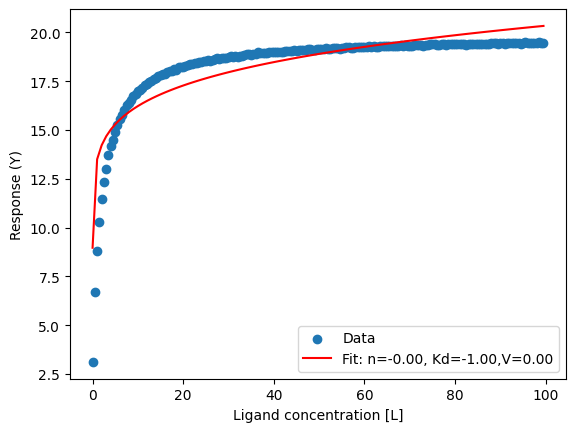

In [10]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Hill equation
def hill_equation(x, n, K_d,V):
    return V*(x ** n) / (K_d + (x ** n))

# Example DataFrame
#df = pd.DataFrame({'x': [0.1, 0.5, 1, 5, 10], 'y': [0.1, 0.3, 0.5, 0.8, 0.9]})

# Extract x and y data
x_data = df['AC'].values
y_data = df['cl'].values

# Initial guess for parameters [n, K_d]
initial_guess = [-0.1, -0.1,20.0]

# Fit the curve
popt, pcov = curve_fit(hill_equation, x_data, y_data, p0=initial_guess)

# Extract the optimized parameters
n, K_d,V = popt

print(f"Hill coefficient (n): {n}")
print(f"Dissociation constant (K_d): {K_d}")
print(f"Dissociation constant (K_d): {V}")

# Plot the results
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = hill_equation(x_fit, *popt)

plt.scatter(x_data, y_data, label='Data')
plt.plot(x_fit, y_fit, color='red', label='Fit: n={:.2f}, Kd={:.2f},V={:.2f}'.format(n, K_d,V))
plt.xlabel('Ligand concentration [L]')
plt.ylabel('Response (Y)')
plt.legend()
plt.show()


Hill coefficient (n): 1.0194921689649648
Dissociation constant (K_d): 1.400243766736306


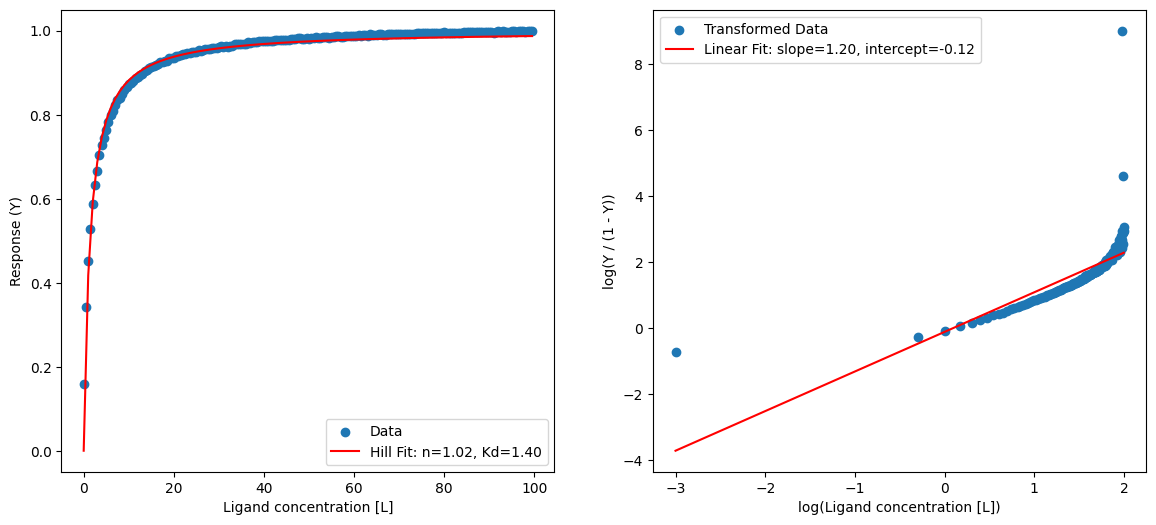

In [35]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Hill equation
def hill_equation(x, n, K_d):
    return (x ** n) / (K_d + (x ** n))

# Load the dataset, skipping the first row
df = pd.read_csv('output_slope_1.01.txt', sep='\s+', skiprows=1)

# Extract x and y data
x_data = df['AC'].values
y_data1 = df['cl'].values
y_data = y_data1 / max(y_data1)  # Normalize y_data

# Initial guess for parameters [n, K_d]
initial_guess = [1.0, 1.0]

# Fit the curve using the Hill equation
popt, pcov = curve_fit(hill_equation, x_data, y_data, p0=initial_guess)

# Extract the optimized parameters
n, K_d = popt

print(f"Hill coefficient (n): {n}")
print(f"Dissociation constant (K_d): {K_d}")

# Generate fitted values for plotting
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = hill_equation(x_fit, *popt)

# Ensure y_data values are strictly between 0 and 1
epsilon = 1e-9
filtered_y_data = np.clip(y_data, epsilon, 1 - epsilon)
filtered_x_data = x_data

# Transform data for the log-log plot
log_x_data = np.log10(x_data)
log_y_data = np.log10(filtered_y_data / (1 - filtered_y_data))

# Fit a linear model to the transformed data
coeffs = np.polyfit(log_x_data, log_y_data, 1)
linear_fit = np.poly1d(coeffs)

# Generate linear fit values
log_x_fit = np.linspace(min(log_x_data), max(log_x_data), 100)
log_y_fit = linear_fit(log_x_fit)

# Plot the original data and the Hill fit
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_fit, y_fit, color='red', label='Hill Fit: n={:.2f}, Kd={:.2f}'.format(n, K_d))
plt.xlabel('Ligand concentration [L]')
plt.ylabel('Response (Y)')
plt.legend()

# Plot the log-log transformed data and the linear fit
plt.subplot(1, 2, 2)
plt.scatter(log_x_data, log_y_data, label='Transformed Data')
plt.plot(log_x_fit, log_y_fit, color='red', label='Linear Fit: slope={:.2f}, intercept={:.2f}'.format(coeffs[0], coeffs[1]))
plt.xlabel('log(Ligand concentration [L])')
plt.ylabel('log(Y / (1 - Y))')
plt.legend()

plt.show()


Hill coefficient (n): 0.8787326573980756
Dissociation constant (K_d): 0.4126115429728869


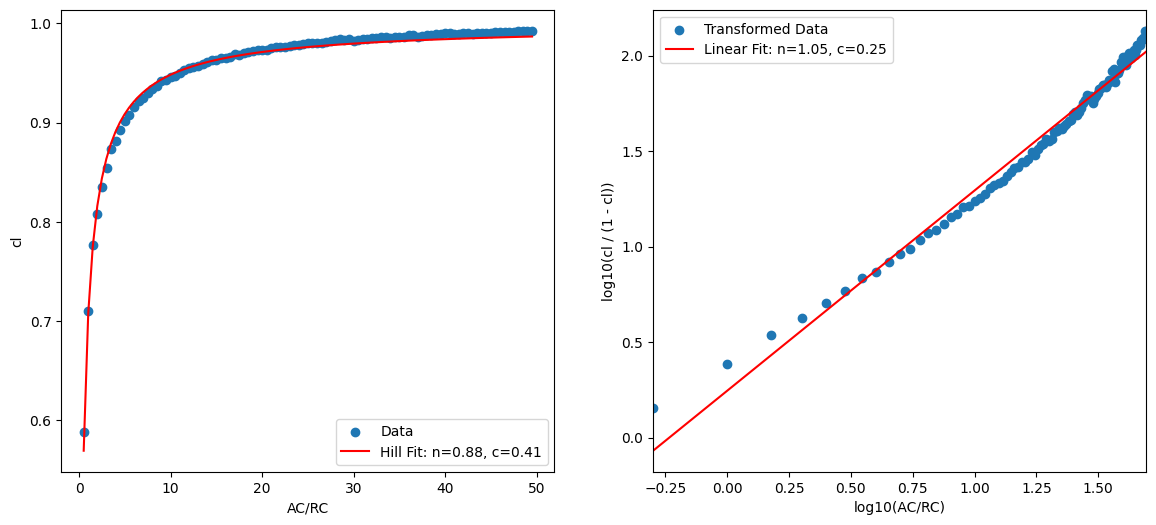

In [81]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Hill equation
def hill_equation(x, n, K_d):
    return (x ** n) / (K_d + (x ** n))

# Load the dataset, skipping the first row
df = pd.read_csv('output3_s1_1_01_slope_1.01.txt', sep='\s+', skiprows=1)

# Extract x and y data
x_data = df['AC'].values
y_data1 = df['cl'].values
y_data = y_data1 / max(y_data1)  # Normalize y_data

# Filter the data to include only x values between 0.1 and 50
mask = (x_data >= 0.1) & (x_data <= 50)
filtered_x_data = x_data[mask]
filtered_y_data = y_data[mask]

# # Initial guess for parameters [n, K_d]
# initial_guess = [1.0, 1.0]

# # Fit the curve using the Hill equation with the filtered data
# popt, pcov = curve_fit(hill_equation, filtered_x_data, filtered_y_data, p0=initial_guess)

# # Extract the optimized parameters
# n, K_d = popt

# print(f"Hill coefficient (n): {n}")
# print(f"Dissociation constant (K_d): {K_d}")

# Generate fitted values for plotting using the filtered x range
x_fit = np.linspace(min(filtered_x_data), max(filtered_x_data), 100)
y_fit = hill_equation(x_fit, *popt)

# Ensure y_data values are strictly between 0 and 1 for the filtered data
epsilon = 1e-9
filtered_y_data_clipped = np.clip(filtered_y_data, epsilon, 1 - epsilon)

# Transform data for the log-log plot using log base 10
log_x_data = np.log10(filtered_x_data)
log_y_data = np.log10(filtered_y_data_clipped / (1 - filtered_y_data_clipped))

# Fit a linear model to the transformed data
coeffs = np.polyfit(log_x_data, log_y_data, 1)
linear_fit = np.poly1d(coeffs)

# # Generate linear fit values
# log_x_fit = np.linspace(min(log_x_data), max(log_x_data), 100)
# log_y_fit = linear_fit(log_x_fit)

# # Plot the original data and the Hill fit
# plt.figure(figsize=(14, 6))

# plt.subplot(1, 2, 1)
# plt.scatter(filtered_x_data, filtered_y_data, label='Data')
# plt.plot(x_fit, y_fit, color='red', label='Hill Fit: n={:.2f}, c={:.2f}'.format(n, K_d))
# plt.xlabel('AC/RC')
# plt.ylabel('cl')
# plt.legend()

# # Plot the log-log transformed data and the linear fit
# plt.subplot(1, 2, 2)
# plt.scatter(log_x_data, log_y_data, label='Transformed Data')
# plt.plot(log_x_fit, log_y_fit, color='red', label='Linear Fit: n={:.2f}, c={:.2f}'.format(coeffs[0], coeffs[1]))
# plt.xlabel('log10(AC/RC)')
# plt.ylabel('log10(cl / (1 - cl))')
# plt.legend()

# # Adjust the x-axis limits for the log plot to match the range of log_x_data
# plt.xlim(min(log_x_data), max(log_x_data))

plt.show()


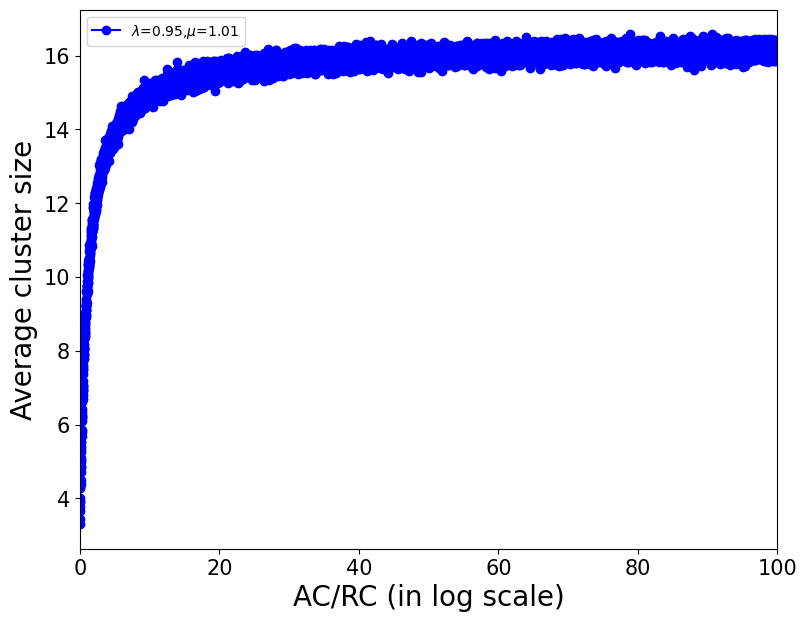

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
O1=pd.read_csv('test_1.01.txt',sep='\s+',skiprows=1)
fig,ax=plt.subplots(figsize=(9,7))
ax.plot(O1['AC'],O1['cl'],color='b',linestyle='-',marker='o',label='$\lambda$=0.95,$\mu$=1.01')
# ax.set_xscale('log')
plt.xlim(0,100)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('AC/RC (in log scale)',fontsize=20)
plt.ylabel('Average cluster size',fontsize=20)
plt.legend()
plt.show()

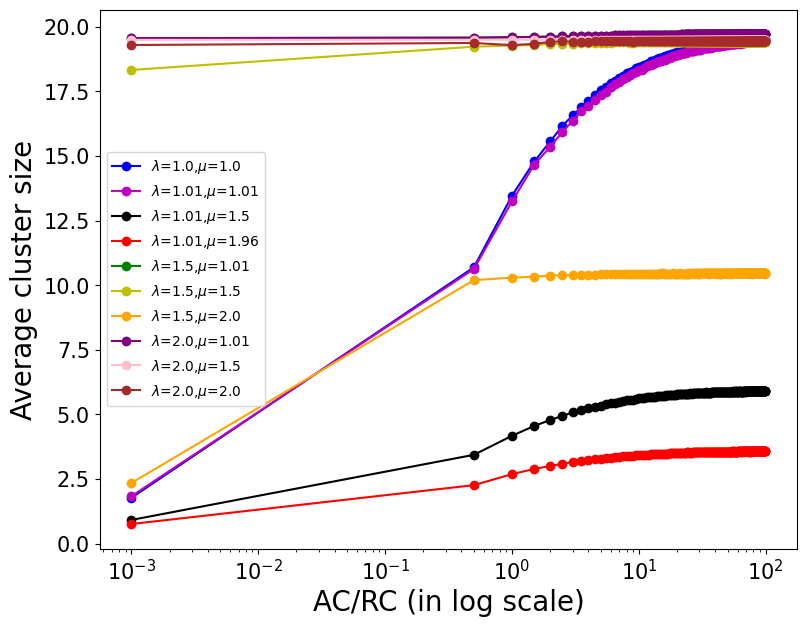

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
O1=pd.read_csv('output3_s1_1_0_slope_1.00.txt',sep='\s+',skiprows=1)
O2=pd.read_csv('output3_s1_1_01_slope_1.01.txt',sep='\s+',skiprows=1)
O3=pd.read_csv('output3_s1_1_01_slope_1.51.txt',sep='\s+',skiprows=1)
O4=pd.read_csv('output3_s1_1_01_slope_1.96.txt',sep='\s+',skiprows=1)
O5=pd.read_csv('output3_s1_1_5_slope_1.01.txt',sep='\s+',skiprows=1)
O6=pd.read_csv('output3_s1_1_5_slope_1.51.txt',sep='\s+',skiprows=1)
O7=pd.read_csv('output3_s1_1_5_slope_1.96.txt',sep='\s+',skiprows=1)
O8=pd.read_csv('output3_s1_2_0_slope_1.01.txt',sep='\s+',skiprows=1)
O9=pd.read_csv('output3_s1_2_0_slope_1.51.txt',sep='\s+',skiprows=1)
O10=pd.read_csv('output3_s1_2_0_slope_1.96.txt',sep='\s+',skiprows=1)
O1['cl'] -= 2
O2['cl'] -= 2
O3['cl'] -= 2
O4['cl'] -= 2
O5['cl'] -= 2
O6['cl'] -= 2
O7['cl'] -= 2
O8['cl'] -= 2
O9['cl'] -= 2
O10['cl'] -= 2
fig,ax=plt.subplots(figsize=(9,7))
ax.plot(O1['AC'],O1['cl'],color='b',linestyle='-',marker='o',label='$\lambda$=1.0,$\mu$=1.0')
ax.plot(O2['AC'],O2['cl'],color='m',linestyle='-',marker='o',label='$\lambda$=1.01,$\mu$=1.01')
ax.plot(O3['AC'],O3['cl'],color='k',linestyle='-',marker='o',label='$\lambda$=1.01,$\mu$=1.5')
ax.plot(O4['AC'],O4['cl'],color='r',linestyle='-',marker='o',label='$\lambda$=1.01,$\mu$=1.96')
ax.plot(O5['AC'],O5['cl'],color='g',linestyle='-',marker='o',label='$\lambda$=1.5,$\mu$=1.01')
ax.plot(O6['AC'],O6['cl'],color='y',linestyle='-',marker='o',label='$\lambda$=1.5,$\mu$=1.5')
ax.plot(O7['AC'],O7['cl'],color='orange',linestyle='-',marker='o',label='$\lambda$=1.5,$\mu$=2.0')
ax.plot(O8['AC'],O8['cl'],color='purple',linestyle='-',marker='o',label='$\lambda$=2.0,$\mu$=1.01')
ax.plot(O9['AC'],O9['cl'],color='pink',linestyle='-',marker='o',label='$\lambda$=2.0,$\mu$=1.5')
ax.plot(O10['AC'],O10['cl'],color='brown',linestyle='-',marker='o',label='$\lambda$=2.0,$\mu$=2.0')
ax.set_xscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('AC/RC (in log scale)',fontsize=20)
plt.ylabel('Average cluster size',fontsize=20)
plt.legend()
plt.show()

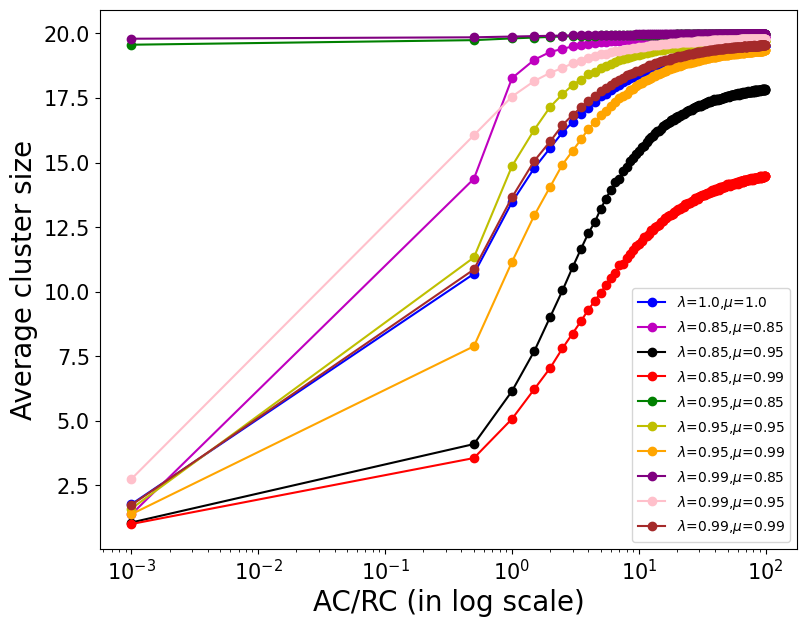

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
O1=pd.read_csv('output3_s1_1_0_slope_1.00.txt',sep='\s+',skiprows=1)
O2=pd.read_csv('output4_s1_0_85_slope_0.85.txt',sep='\s+',skiprows=1)
O3=pd.read_csv('output4_s1_0_85_slope_0.95.txt',sep='\s+',skiprows=1)
O4=pd.read_csv('output4_s1_0_85_slope_0.99.txt',sep='\s+',skiprows=1)
O5=pd.read_csv('output4_s1_0_95_slope_0.85.txt',sep='\s+',skiprows=1)
O6=pd.read_csv('output4_s1_0_95_slope_0.95.txt',sep='\s+',skiprows=1)
O7=pd.read_csv('output4_s1_0_95_slope_0.99.txt',sep='\s+',skiprows=1)
O8=pd.read_csv('output4_s1_0_99_slope_0.85.txt',sep='\s+',skiprows=1)
O9=pd.read_csv('output4_s1_0_99_slope_0.95.txt',sep='\s+',skiprows=1)
O10=pd.read_csv('output4_s1_0_99_slope_0.99.txt',sep='\s+',skiprows=1)
O1['cl'] -= 2
O2['cl'] -= 2
O3['cl'] -= 2
O4['cl'] -= 2
O5['cl'] -= 2
O6['cl'] -= 2
O7['cl'] -= 2
O8['cl'] -= 2
O9['cl'] -= 2
O10['cl'] -= 2
fig,ax=plt.subplots(figsize=(9,7))
ax.plot(O1['AC'],O1['cl'],color='b',linestyle='-',marker='o',label='$\lambda$=1.0,$\mu$=1.0')
ax.plot(O2['AC'],O2['cl'],color='m',linestyle='-',marker='o',label='$\lambda$=0.85,$\mu$=0.85')
ax.plot(O3['AC'],O3['cl'],color='k',linestyle='-',marker='o',label='$\lambda$=0.85,$\mu$=0.95')
ax.plot(O4['AC'],O4['cl'],color='r',linestyle='-',marker='o',label='$\lambda$=0.85,$\mu$=0.99')
ax.plot(O5['AC'],O5['cl'],color='g',linestyle='-',marker='o',label='$\lambda$=0.95,$\mu$=0.85')
ax.plot(O6['AC'],O6['cl'],color='y',linestyle='-',marker='o',label='$\lambda$=0.95,$\mu$=0.95')
ax.plot(O7['AC'],O7['cl'],color='orange',linestyle='-',marker='o',label='$\lambda$=0.95,$\mu$=0.99')
ax.plot(O8['AC'],O8['cl'],color='purple',linestyle='-',marker='o',label='$\lambda$=0.99,$\mu$=0.85')
ax.plot(O9['AC'],O9['cl'],color='pink',linestyle='-',marker='o',label='$\lambda$=0.99,$\mu$=0.95')
ax.plot(O10['AC'],O10['cl'],color='brown',linestyle='-',marker='o',label='$\lambda$=0.99,$\mu$=0.99')
ax.set_xscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('AC/RC (in log scale)',fontsize=20)
plt.ylabel('Average cluster size',fontsize=20)
plt.legend()
plt.show()

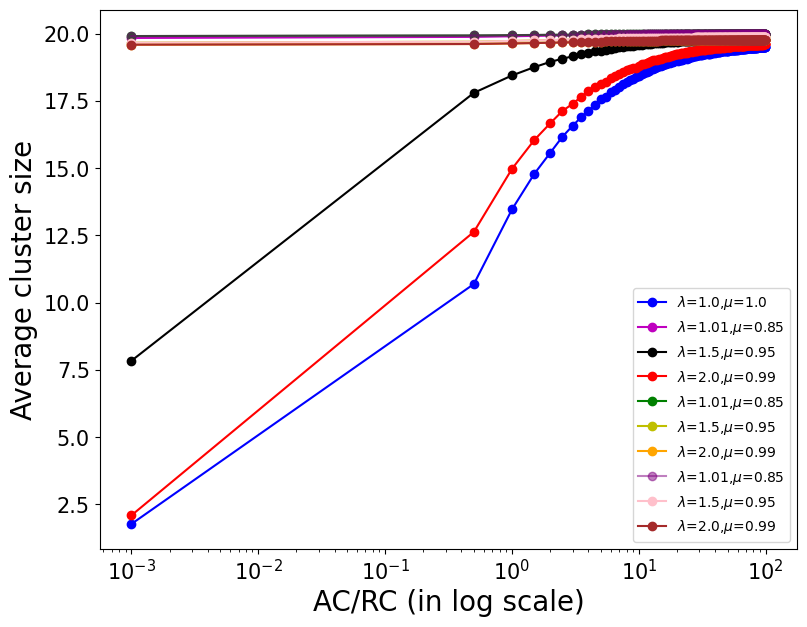

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
O1=pd.read_csv('output3_s1_1_0_slope_1.00.txt',sep='\s+',skiprows=1)
O2=pd.read_csv('output2_s1_1_01_slope_0.85.txt',sep='\s+',skiprows=1)
O3=pd.read_csv('output2_s1_1_01_slope_0.95.txt',sep='\s+',skiprows=1)
O4=pd.read_csv('output2_s1_1_01_slope_0.99.txt',sep='\s+',skiprows=1)
O5=pd.read_csv('output2_s1_1_5_slope_0.85.txt',sep='\s+',skiprows=1)
O6=pd.read_csv('output2_s1_1_5_slope_0.95.txt',sep='\s+',skiprows=1)
O7=pd.read_csv('output2_s1_1_5_slope_0.99.txt',sep='\s+',skiprows=1)
O8=pd.read_csv('output2_s1_2_slope_0.85.txt',sep='\s+',skiprows=1)
O9=pd.read_csv('output2_s1_2_slope_0.95.txt',sep='\s+',skiprows=1)
O10=pd.read_csv('output2_s1_2_slope_0.99.txt',sep='\s+',skiprows=1)
O1['cl'] -= 2
O2['cl'] -= 2
O3['cl'] -= 2
O4['cl'] -= 2
O5['cl'] -= 2
O6['cl'] -= 2
O7['cl'] -= 2
O8['cl'] -= 2
O9['cl'] -= 2
O10['cl'] -= 2
fig,ax=plt.subplots(figsize=(9,7))
ax.plot(O1['AC'],O1['cl'],color='b',linestyle='-',marker='o',label='$\lambda$=1.0,$\mu$=1.0')
ax.plot(O2['AC'],O2['cl'],color='m',linestyle='-',marker='o',label='$\lambda$=1.01,$\mu$=0.85')
ax.plot(O3['AC'],O3['cl'],color='k',linestyle='-',marker='o',label='$\lambda$=1.5,$\mu$=0.95')
ax.plot(O4['AC'],O4['cl'],color='r',linestyle='-',marker='o',label='$\lambda$=2.0,$\mu$=0.99')
ax.plot(O5['AC'],O5['cl'],color='g',linestyle='-',marker='o',label='$\lambda$=1.01,$\mu$=0.85')
ax.plot(O6['AC'],O6['cl'],color='y',linestyle='-',marker='o',label='$\lambda$=1.5,$\mu$=0.95')
ax.plot(O7['AC'],O7['cl'],color='orange',linestyle='-',marker='o',label='$\lambda$=2.0,$\mu$=0.99')
ax.plot(O8['AC'],O8['cl'],color='purple',linestyle='-',marker='o',alpha=0.5,label='$\lambda$=1.01,$\mu$=0.85')
ax.plot(O9['AC'],O9['cl'],color='pink',linestyle='-',marker='o',label='$\lambda$=1.5,$\mu$=0.95')
ax.plot(O10['AC'],O10['cl'],color='brown',linestyle='-',marker='o',label='$\lambda$=2.0,$\mu$=0.99')
ax.set_xscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('AC/RC (in log scale)',fontsize=20)
plt.ylabel('Average cluster size',fontsize=20)
plt.legend()
plt.show()

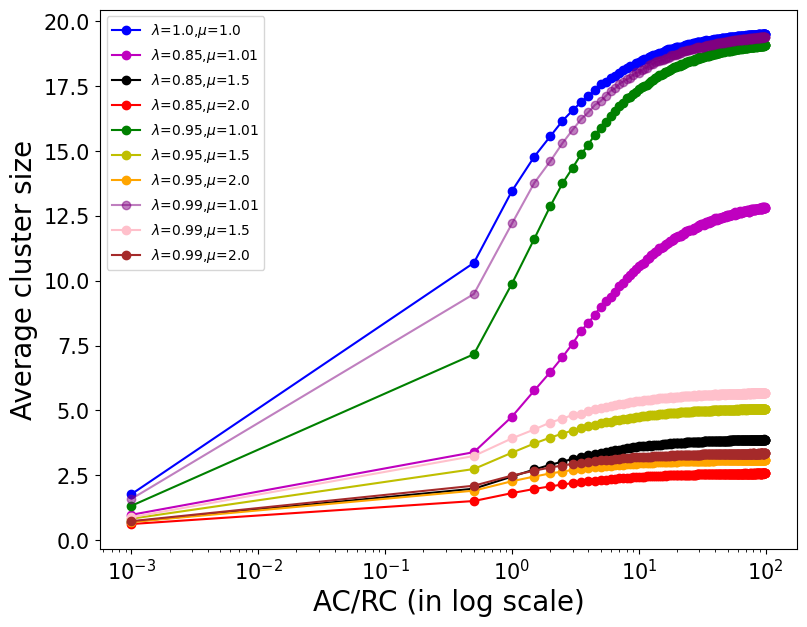

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
O1=pd.read_csv('output3_s1_1_0_slope_1.00.txt',sep='\s+',skiprows=1)
O2=pd.read_csv('output_s1_0_85_slope_1.01.txt',sep='\s+',skiprows=1)
O3=pd.read_csv('output_s1_0_85_slope_1.50.txt',sep='\s+',skiprows=1)
O4=pd.read_csv('output_s1_0_85_slope_2.00.txt',sep='\s+',skiprows=1)
O5=pd.read_csv('output_s1_0_95_slope_1.01.txt',sep='\s+',skiprows=1)
O6=pd.read_csv('output_s1_0_95_slope_1.50.txt',sep='\s+',skiprows=1)
O7=pd.read_csv('output_s1_0_95_slope_2.00.txt',sep='\s+',skiprows=1)
O8=pd.read_csv('output_s1_0_99_slope_1.01.txt',sep='\s+',skiprows=1)
O9=pd.read_csv('output_s1_0_99_slope_1.50.txt',sep='\s+',skiprows=1)
O10=pd.read_csv('output_s1_0_99_slope_2.00.txt',sep='\s+',skiprows=1)
O1['cl'] -= 2
O2['cl'] -= 2
O3['cl'] -= 2
O4['cl'] -= 2
O5['cl'] -= 2
O6['cl'] -= 2
O7['cl'] -= 2
O8['cl'] -= 2
O9['cl'] -= 2
O10['cl'] -= 2
fig,ax=plt.subplots(figsize=(9,7))
ax.plot(O1['AC'],O1['cl'],color='b',linestyle='-',marker='o',label='$\lambda$=1.0,$\mu$=1.0')
ax.plot(O2['AC'],O2['cl'],color='m',linestyle='-',marker='o',label='$\lambda$=0.85,$\mu$=1.01')
ax.plot(O3['AC'],O3['cl'],color='k',linestyle='-',marker='o',label='$\lambda$=0.85,$\mu$=1.5')
ax.plot(O4['AC'],O4['cl'],color='r',linestyle='-',marker='o',label='$\lambda$=0.85,$\mu$=2.0')
ax.plot(O5['AC'],O5['cl'],color='g',linestyle='-',marker='o',label='$\lambda$=0.95,$\mu$=1.01')
ax.plot(O6['AC'],O6['cl'],color='y',linestyle='-',marker='o',label='$\lambda$=0.95,$\mu$=1.5')
ax.plot(O7['AC'],O7['cl'],color='orange',linestyle='-',marker='o',label='$\lambda$=0.95,$\mu$=2.0')
ax.plot(O8['AC'],O8['cl'],color='purple',linestyle='-',marker='o',alpha=0.5,label='$\lambda$=0.99,$\mu$=1.01')
ax.plot(O9['AC'],O9['cl'],color='pink',linestyle='-',marker='o',label='$\lambda$=0.99,$\mu$=1.5')
ax.plot(O10['AC'],O10['cl'],color='brown',linestyle='-',marker='o',label='$\lambda$=0.99,$\mu$=2.0')
ax.set_xscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('AC/RC (in log scale)',fontsize=20)
plt.ylabel('Average cluster size',fontsize=20)
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Hill equation
def hill_equation(x, n, c):
    return (x ** n) / (c + (x ** n))


In [72]:
#For lambda>1,mu>1
O1=pd.read_csv('output3_s1_1_0_slope_1.00.txt',sep='\s+',skiprows=1)
O2=pd.read_csv('output3_s1_1_01_slope_1.01.txt',sep='\s+',skiprows=1)
O3=pd.read_csv('output3_s1_1_01_slope_1.51.txt',sep='\s+',skiprows=1)
O4=pd.read_csv('output3_s1_1_01_slope_1.96.txt',sep='\s+',skiprows=1)
O5=pd.read_csv('output3_s1_1_5_slope_1.01.txt',sep='\s+',skiprows=1)
O6=pd.read_csv('output3_s1_1_5_slope_1.51.txt',sep='\s+',skiprows=1)
O7=pd.read_csv('output3_s1_1_5_slope_1.96.txt',sep='\s+',skiprows=1)
O8=pd.read_csv('output3_s1_2_0_slope_1.01.txt',sep='\s+',skiprows=1)
O9=pd.read_csv('output3_s1_2_0_slope_1.51.txt',sep='\s+',skiprows=1)
O10=pd.read_csv('output3_s1_2_0_slope_1.96.txt',sep='\s+',skiprows=1)
O1['cl'] -= 2
O2['cl'] -= 2
O3['cl'] -= 2
O4['cl'] -= 2
O5['cl'] -= 2
O6['cl'] -= 2
O7['cl'] -= 2
O8['cl'] -= 2
O9['cl'] -= 2
O10['cl'] -= 2
# Extract x and y data
x_data_1 = O1['AC'].values
y_data1 = O1['cl'].values
y_data_1 = y_data1 / max(y_data1)  # Normalize y_data

# Filter the data to include only x values between 0.1 and 50
mask1 = (x_data_1 >= 0.1) & (x_data <= 50)
filtered_x_data1 = x_data_1[mask1]
filtered_y_data1 = y_data_1[mask1]

# Initial guess for parameters [n, K_d]
initial_guess = [1.0, 1.0]

# Fit the curve using the Hill equation with the filtered data
popt1, pcov1 = curve_fit(hill_equation, filtered_x_data1, filtered_y_data1, p0=initial_guess)

# Extract the optimized parameters
print(popt1)



[0.91996293 0.43122436]


In [83]:
#For lambda>1,mu>1
O1=pd.read_csv('output3_s1_1_0_slope_1.00.txt',sep='\s+',skiprows=1)
O2=pd.read_csv('output3_s1_1_01_slope_1.01.txt',sep='\s+',skiprows=1)
O3=pd.read_csv('output3_s1_1_01_slope_1.51.txt',sep='\s+',skiprows=1)
O4=pd.read_csv('output3_s1_1_01_slope_1.96.txt',sep='\s+',skiprows=1)
O5=pd.read_csv('output3_s1_1_5_slope_1.01.txt',sep='\s+',skiprows=1)
O6=pd.read_csv('output3_s1_1_5_slope_1.51.txt',sep='\s+',skiprows=1)
O7=pd.read_csv('output3_s1_1_5_slope_1.96.txt',sep='\s+',skiprows=1)
O8=pd.read_csv('output3_s1_2_0_slope_1.01.txt',sep='\s+',skiprows=1)
O9=pd.read_csv('output3_s1_2_0_slope_1.51.txt',sep='\s+',skiprows=1)
O10=pd.read_csv('output3_s1_2_0_slope_1.96.txt',sep='\s+',skiprows=1)
O1['cl'] -= 2
O2['cl'] -= 2
O3['cl'] -= 2
O4['cl'] -= 2
O5['cl'] -= 2
O6['cl'] -= 2
O7['cl'] -= 2
O8['cl'] -= 2
O9['cl'] -= 2
O10['cl'] -= 2

In [71]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# Define the Hill equation
def hill_equation(x, n, K_d):
    return (x**n) / (K_d**n + x**n)

# List to store the datasets
datasets = [O1, O2, O3, O4, O5, O6, O7, O8, O9, O10]

# List to store the optimized parameters for each dataset
popt_list = []

# Iterate over each dataset to evaluate popt
for i, O in enumerate(datasets, 1):
    x_data = O['AC'].values
    y_data = O['cl'].values
    y_data_normalized = y_data / max(y_data)  # Normalize y_data

    # Filter the data to include only x values between 0.1 and 50
    mask = (x_data >= 0.1) & (x_data <= 50)
    filtered_x_data = x_data[mask]
    filtered_y_data = y_data_normalized[mask]

    # Initial guess for parameters [n, K_d]
    initial_guess = [1.0, 1.0]

    # Fit the curve using the Hill equation with the filtered data
    popt, pcov = curve_fit(hill_equation, filtered_x_data, filtered_y_data, p0=initial_guess)

    # Store the optimized parameters
    popt_list.append(popt)

    # Print the optimized parameters
    print(f'popt{i}:', popt)

# Now popt_list contains popt1 to popt10


popt1: [0.91996293 0.43122436]
popt2: [0.89911008 0.44084131]
popt3: [0.89151774 0.37966012]
popt4: [0.87694826 0.28875689]
popt5: [5.56873288e-01 1.12668324e-04]
popt6: [0.71516524 0.00098963]
popt7: [0.61655209 0.00147595]
popt8: [5.54647171e-01 1.08054027e-04]
popt9: [4.48159188e-01 1.19010668e-08]
popt10: [7.22981976e-01 6.15416846e-04]


C:\Users\User1\AppData\Local\Temp\ipykernel_3084\1778096650.py:7: RuntimeWarning: invalid value encountered in double_scalars
  return (x**n) / (K_d**n + x**n)


In [85]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# List of datasets
datasets = [O1, O2, O3, O4, O5, O6, O7, O8, O9, O10]

# Iterate over datasets
for i, dataset in enumerate(datasets, start=1):
    # Extract data
    x_data = dataset['AC'].values
    y_data = dataset['cl'].values
    y_data = y_data / max(y_data)  # Normalize y_data

    # Filter the data to include only x values between 0.1 and 50
    mask = (x_data >= 0.1) & (x_data <= 50)
    filtered_x_data = x_data[mask]
    filtered_y_data = y_data[mask]
      

    # Ensure y_data values are strictly between 0 and 1 for the filtered data
    epsilon = 1e-9
    filtered_y_data_clipped = np.clip(filtered_y_data, epsilon, 1 - epsilon)

    # Transform data for the log-log plot using log base 10
    log_x_data = np.log10(filtered_x_data)
    log_y_data = np.log10(filtered_y_data_clipped / (1 - filtered_y_data_clipped))

    # Fit a linear model to the transformed data
    coeffs = np.polyfit(log_x_data, log_y_data, 1)
    linear_fit = np.poly1d(coeffs)
    
    # Print the coefficients for each dataset
    print(f"Linear fit coefficients for O{i}: slope = {coeffs[0]}, intercept = {coeffs[1]}")


Linear fit coefficients for O1: slope = 1.0752112124618125, intercept = 0.20972707138050442
Linear fit coefficients for O2: slope = 1.0562067973340266, intercept = 0.19062108425265367
Linear fit coefficients for O3: slope = 1.024192264044533, intercept = 0.26821312030036665
Linear fit coefficients for O4: slope = 1.0124987966255765, intercept = 0.36325061406180054
Linear fit coefficients for O5: slope = 0.8475225863506601, intercept = 1.9391548000496108
Linear fit coefficients for O6: slope = 0.9476036866957162, intercept = 1.9748043375361193
Linear fit coefficients for O7: slope = 0.6173931139163652, intercept = 1.757797939795088
Linear fit coefficients for O8: slope = 0.842394944266481, intercept = 1.9423308826529762
Linear fit coefficients for O9: slope = 0.9557653130545175, intercept = 3.137664107920968
Linear fit coefficients for O10: slope = 0.9550406724245397, intercept = 2.2794280443435655


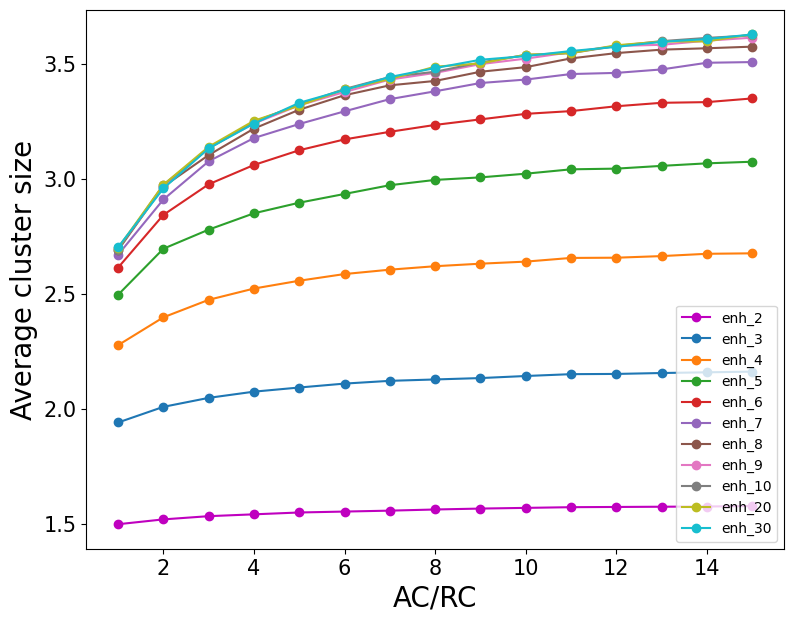

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
AR=pd.read_csv('AR_rg_1.txt',sep='\s+')
fig,ax=plt.subplots(figsize=(9,7))
plt.plot(AR['A/R'],AR['enh_2'],color='m',linestyle='-',marker='o',label='enh_2')
plt.plot(AR['A/R'],AR['enh_3'],linestyle='-',marker='o',label='enh_3')
plt.plot(AR['A/R'],AR['enh_4'],linestyle='-',marker='o',label='enh_4')
plt.plot(AR['A/R'],AR['enh_5'],linestyle='-',marker='o',label='enh_5')
plt.plot(AR['A/R'],AR['enh_6'],linestyle='-',marker='o',label='enh_6')
plt.plot(AR['A/R'],AR['enh_7'],linestyle='-',marker='o',label='enh_7')
plt.plot(AR['A/R'],AR['enh_8'],linestyle='-',marker='o',label='enh_8')
plt.plot(AR['A/R'],AR['enh_9'],linestyle='-',marker='o',label='enh_9')
plt.plot(AR['A/R'],AR['enh_10'],linestyle='-',marker='o',label='enh_10')
plt.plot(AR['A/R'],AR['enh_20'],linestyle='-',marker='o',label='enh_20')
plt.plot(AR['A/R'],AR['enh_30'],linestyle='-',marker='o',label='enh_30')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('AC/RC',fontsize=20)
plt.ylabel('Average cluster size',fontsize=20)
plt.legend()
plt.show()

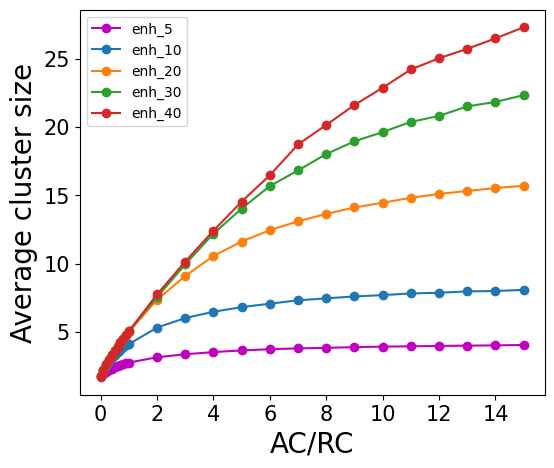

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
AR=pd.read_csv('new_AR',sep='\s+')
fig,ax=plt.subplots(figsize=(6,5))
plt.plot(AR['A/R'],AR['enh_5'],color='m',linestyle='-',marker='o',label='enh_5')
plt.plot(AR['A/R'],AR['enh_10'],linestyle='-',marker='o',label='enh_10')
plt.plot(AR['A/R'],AR['enh_20'],linestyle='-',marker='o',label='enh_20')
plt.plot(AR['A/R'],AR['enh_30'],linestyle='-',marker='o',label='enh_30')
plt.plot(AR['A/R'],AR['enh_40'],linestyle='-',marker='o',label='enh_40')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('AC/RC',fontsize=20)
plt.ylabel('Average cluster size',fontsize=20)
plt.legend()
plt.show()

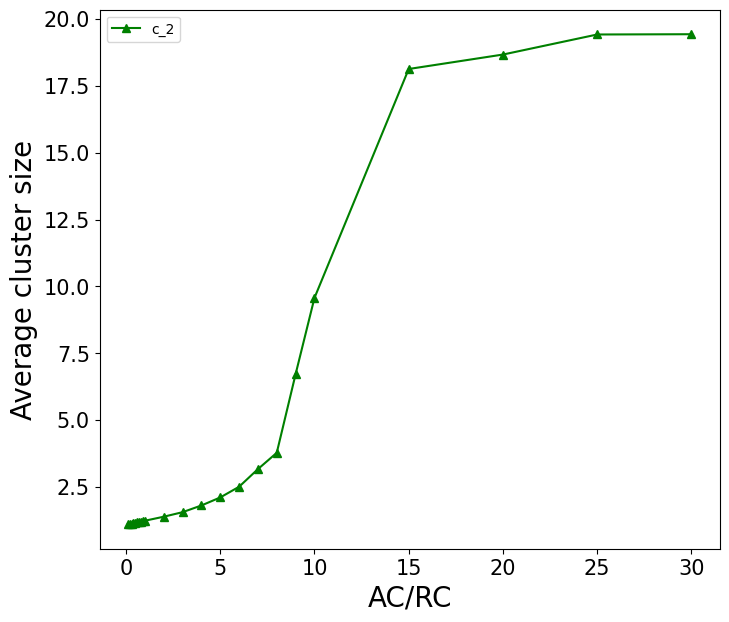

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
AR=pd.read_csv('switching',sep='\s+')
fig,ax=plt.subplots(figsize=(8,7))
# plt.plot(AR['A/R'],AR['c1'],color='m',linestyle='-',marker='o',label='c_1')
plt.plot(AR['A/R'],AR['c2'],color='g',linestyle='-',marker='^',label='c_2')
# plt.xlim(-5,25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('AC/RC',fontsize=20)
plt.ylabel('Average cluster size',fontsize=20)
plt.legend()
plt.show()

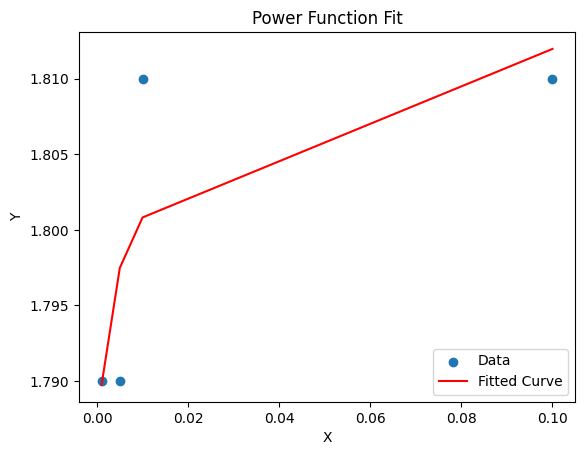

Optimized parameters (a, b): 1.823191954778231 0.0026811943165391838


In [47]:
x=AR['A/R']
y=AR['enh_20']
from scipy.optimize import curve_fit
def power_function(x, a, b):
    return a * x**b

# Fit the data to the function
popt, pcov = curve_fit(power_function, x, y)

# Extract the optimized parameters
a, b = popt

# Plot the original data and the fitted curve
plt.scatter(x, y, label='Data')
plt.plot(x, power_function(x, a, b), color='red', label='Fitted Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Power Function Fit')
plt.legend()
plt.show()

# Print the optimized parameters
print("Optimized parameters (a, b):", a, b)

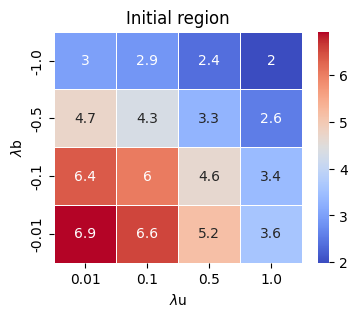

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('diff_mid',sep='\s+')
heatmap_data = df.pivot(index='sb', columns='su', values='diff_init')

# Plotting the heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Initial region')
plt.xlabel('$\lambda$u')
plt.ylabel('$\lambda$b')
plt.show()

In [2]:
pip install seaborn

     -------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


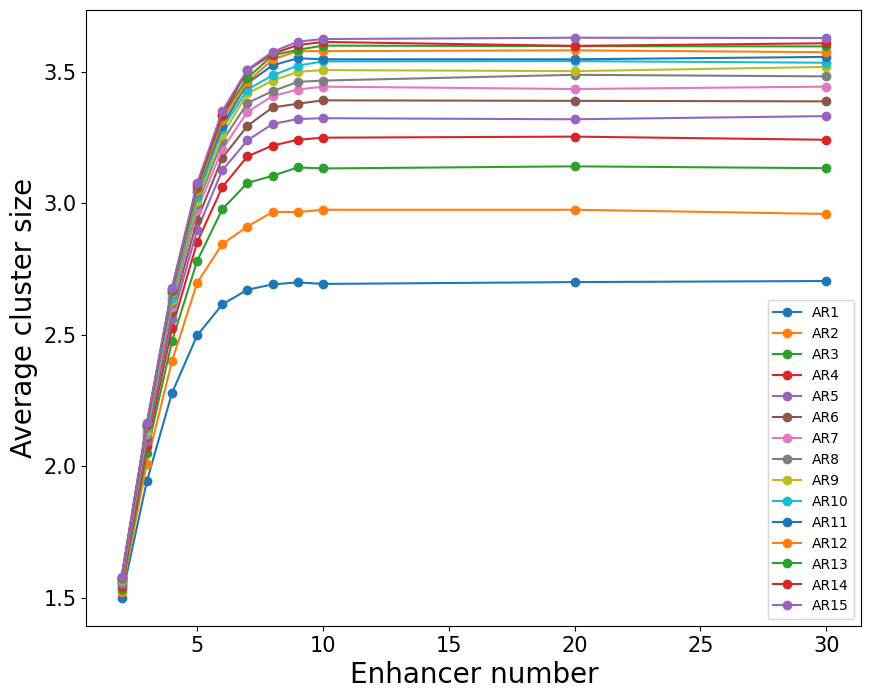

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
EN=pd.read_csv('EN_rg_1.txt',sep='\s+')
fig,ax=plt.subplots(figsize=(10,8))
plt.plot(EN['Enh_number'],EN['AR1'],linestyle='-',marker='o',label='AR1')
plt.plot(EN['Enh_number'],EN['AR2'],linestyle='-',marker='o',label='AR2')
plt.plot(EN['Enh_number'],EN['AR3'],linestyle='-',marker='o',label='AR3')
plt.plot(EN['Enh_number'],EN['AR4'],linestyle='-',marker='o',label='AR4')
plt.plot(EN['Enh_number'],EN['AR5'],linestyle='-',marker='o',label='AR5')
plt.plot(EN['Enh_number'],EN['AR6'],linestyle='-',marker='o',label='AR6')
plt.plot(EN['Enh_number'],EN['AR7'],linestyle='-',marker='o',label='AR7')
plt.plot(EN['Enh_number'],EN['AR8'],linestyle='-',marker='o',label='AR8')
plt.plot(EN['Enh_number'],EN['AR9'],linestyle='-',marker='o',label='AR9')
plt.plot(EN['Enh_number'],EN['AR10'],linestyle='-',marker='o',label='AR10')
plt.plot(EN['Enh_number'],EN['AR11'],linestyle='-',marker='o',label='AR11')
plt.plot(EN['Enh_number'],EN['AR12'],linestyle='-',marker='o',label='AR12')
plt.plot(EN['Enh_number'],EN['AR13'],linestyle='-',marker='o',label='AR13')
plt.plot(EN['Enh_number'],EN['AR14'],linestyle='-',marker='o',label='AR14')
plt.plot(EN['Enh_number'],EN['AR15'],linestyle='-',marker='o',label='AR15')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Enhancer number',fontsize=20)
plt.ylabel('Average cluster size',fontsize=20)
plt.legend()
plt.show()

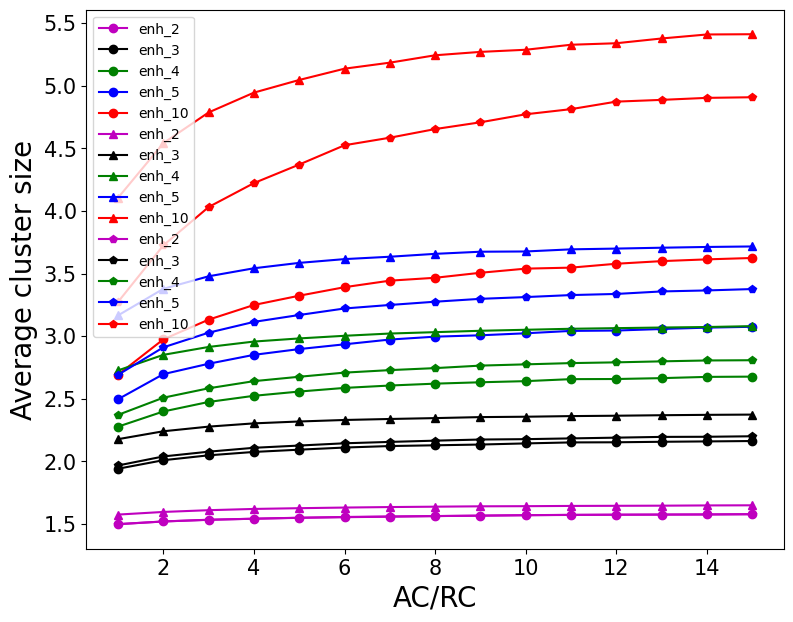

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
AR=pd.read_csv('AR_rg_1.txt',sep='\s+')
AR2=pd.read_csv('AR_rg_2.txt',sep='\s+')
AR3=pd.read_csv('AR_rg_1_rg5.txt',sep='\s+')
fig,ax=plt.subplots(figsize=(9,7))
plt.plot(AR['A/R'],AR['enh_2'],color='m',linestyle='-',marker='o',label='enh_2')
plt.plot(AR['A/R'],AR['enh_3'],color='k',linestyle='-',marker='o',label='enh_3')
plt.plot(AR['A/R'],AR['enh_4'],color='g',linestyle='-',marker='o',label='enh_4')
plt.plot(AR['A/R'],AR['enh_5'],color='b',linestyle='-',marker='o',label='enh_5')
# plt.plot(AR['A/R'],AR['enh_6'],color='m',linestyle='-',marker='o',label='enh_6')
# plt.plot(AR['A/R'],AR['enh_7'],color='y',linestyle='-',marker='o',label='enh_7')
# plt.plot(AR['A/R'],AR['enh_8'],color='r',linestyle='-',marker='o',label='enh_8')
# plt.plot(AR['A/R'],AR['enh_9'],color='b',linestyle='-',marker='o',label='enh_9')
plt.plot(AR['A/R'],AR['enh_10'],color='r',linestyle='-',marker='o',label='enh_10')
# plt.plot(AR['A/R'],AR['enh_20'],color='k',linestyle='-',marker='o',label='enh_20')
# plt.plot(AR['A/R'],AR['enh_30'],color='c',linestyle='-',marker='o',label='enh_30')
plt.plot(AR2['A/R'],AR2['enh_2'],color='m',linestyle='-',marker='^',label='enh_2')
plt.plot(AR2['A/R'],AR2['enh_3'],color='k',linestyle='-',marker='^',label='enh_3')
plt.plot(AR2['A/R'],AR2['enh_4'],color='g',linestyle='-',marker='^',label='enh_4')
plt.plot(AR2['A/R'],AR2['enh_5'],color='b',linestyle='-',marker='^',label='enh_5')
# plt.plot(AR2['A/R'],AR2['enh_6'],color='m',linestyle='-',marker='^',label='enh_6')
# plt.plot(AR2['A/R'],AR2['enh_7'],color='y',linestyle='-',marker='^',label='enh_7')
# plt.plot(AR2['A/R'],AR2['enh_8'],color='r',linestyle='-',marker='^',label='enh_8')
# plt.plot(AR2['A/R'],AR2['enh_9'],color='b',linestyle='-',marker='^',label='enh_9')
plt.plot(AR2['A/R'],AR2['enh_10'],color='r',linestyle='-',marker='^',label='enh_10')
# plt.plot(AR2['A/R'],AR2['enh_20'],color='k',linestyle='-',marker='^',label='enh_20')
# plt.plot(AR2['A/R'],AR2['enh_30'],color='c',linestyle='-',marker='^',label='enh_30')
plt.plot(AR3['A/R'],AR3['enh_2'],color='m',linestyle='-',marker='p',label='enh_2')
plt.plot(AR3['A/R'],AR3['enh_3'],color='k',linestyle='-',marker='p',label='enh_3')
plt.plot(AR3['A/R'],AR3['enh_4'],color='g',linestyle='-',marker='p',label='enh_4')
plt.plot(AR3['A/R'],AR3['enh_5'],color='b',linestyle='-',marker='p',label='enh_5')
plt.plot(AR3['A/R'],AR3['enh_10'],color='r',linestyle='-',marker='p',label='enh_10')
# plt.plot(AR3['A/R'],AR3['enh_20'],color='k',linestyle='-',marker='p',label='enh_20')
# plt.plot(AR3['A/R'],AR3['enh_30'],color='c',linestyle='-',marker='p',label='enh_30')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('AC/RC',fontsize=20)
plt.ylabel('Average cluster size',fontsize=20)
plt.legend()
plt.show()

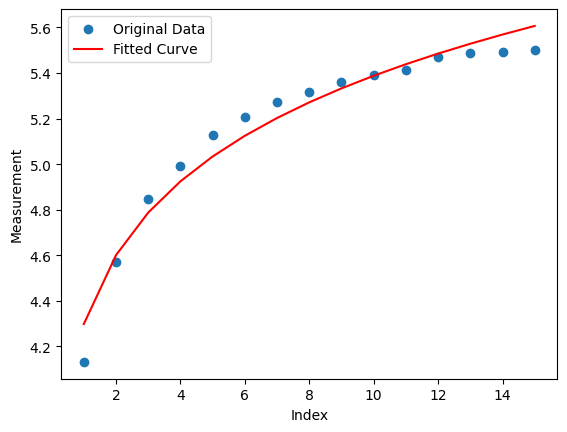

Fitted Parameters (a, b): [4.29825729 0.098122  ]


In [8]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the function to fit
def func(x, a, b):
    return a * ((x)**b)

# Load your data into numpy arrays
index = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
measurement = np.array([4.132, 4.569, 4.849, 4.993, 5.129, 5.207, 5.273, 5.315, 5.362, 5.392, 5.415, 5.471, 5.487, 5.491, 5.502])

# Provide initial guesses for the parameters
initial_guess = (-1.0, 0.0)
bounds = ([-10.0, -5], [100.0, 100.0]) 
# Fit the curve to the data
popt, pcov = curve_fit(func, index, measurement, p0=initial_guess,bounds=bounds)

# Plot the original data
plt.scatter(index, measurement, label='Original Data')

# Plot the fitted curve
plt.plot(index, func(index, *popt), 'r-', label='Fitted Curve')

plt.xlabel('Index')
plt.ylabel('Measurement')
plt.legend()
plt.show()

# Print the parameters of the fitted curve
print("Fitted Parameters (a, b):", popt)


In [488]:
df['diff'] = abs(df[0].shift(-1) - df[0])

In [489]:
df

,0,1,diff
0,0.002144,1.0,0.428787
1,0.430931,1.0,0.376173
2,0.054758,2.0,0.037754
3,0.092512,3.0,0.082890
4,0.009622,3.0,0.004955
...,...,...,...
956639,0.003277,2.0,0.025499
956640,0.028776,2.0,0.020630
956641,0.049406,1.0,0.036550
956642,0.012856,2.0,0.060674


In [490]:
df = df.dropna()

In [82]:
df

,0,1,diff
0,0.637242,1.0,0.113318
1,0.523924,2.0,0.396133
2,0.127791,3.0,0.074014
3,0.053777,2.0,0.012910
4,0.066687,3.0,0.055572
...,...,...,...
950174,0.005880,5.0,0.223093
950175,0.228973,4.0,0.051011
950176,0.177962,3.0,0.494619
950177,0.672581,2.0,0.534573


In [83]:
df2=df[df[1]==3.0]

In [84]:
df2

,0,1,diff
2,0.127791,3.0,0.074014
4,0.066687,3.0,0.055572
10,0.137964,3.0,0.120120
12,0.281033,3.0,0.050345
16,0.227555,3.0,0.074076
...,...,...,...
950163,0.015301,3.0,0.264520
950165,0.217438,3.0,0.073034
950172,0.031833,3.0,0.082105
950176,0.177962,3.0,0.494619


In [198]:
differences = df2.diff()

# Drop the first row since it will have NaN values
differences = differences.dropna()

In [199]:
differences

,0,1


In [13]:
rate_parameter = df2['diff'].mean()

In [14]:
rate_parameter

0.23742746277923343

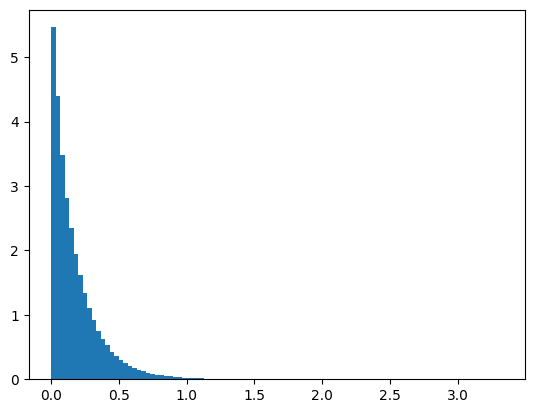

In [87]:
import matplotlib.pyplot as plt
plt.hist(df['diff'],bins=100,density=True)
plt.show()

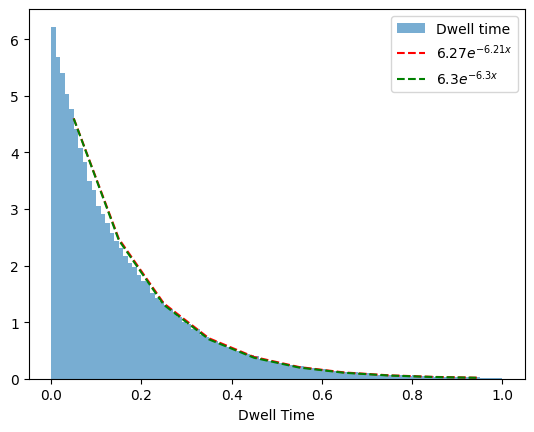

[6.27857138 6.21095668]


In [90]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Sample histogram data (replace this with your actual data)
data = df2['diff'].dropna()
data = data[data <= 1.0]

# Define the custom exponential function with specific parameters
def custom_exponential_func(x, a, b):
    return a * np.exp(-b * x)

# Fit the exponential function to the histogram data with boundaries
hist, bins = np.histogram(data, density=True)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
popt, pcov = curve_fit(custom_exponential_func, bin_centers, hist, bounds=([0.0, 0.0], [12.0, 12.0]))

# Plot the histogram
plt.hist(data, bins=100,density=True, alpha=0.6, label='Dwell time')

# Plot the custom exponential curve using the fitted parameters
plt.plot(bin_centers, custom_exponential_func(bin_centers, *popt), 'r--', label='$6.27 e^{-6.21x}$')

# Plot the custom exponential curve with specific parameters
plt.plot(bin_centers, custom_exponential_func(bin_centers, 6.3, 6.3), 'g--', label=r'$6.3 e^{-6.3x}$')
plt.xlabel('Dwell Time')
plt.legend()
plt.show()
print(popt)


In [290]:
df1=df.iloc[200:300]

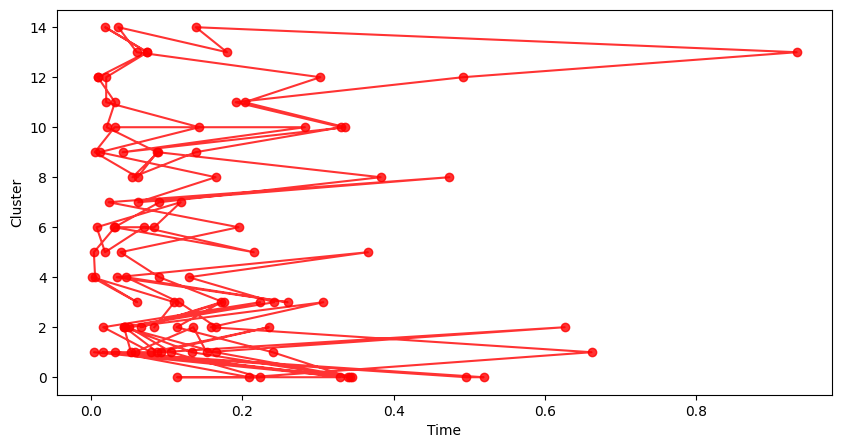

In [291]:
import matplotlib.pyplot as plt
# Plotting
fig,ax=plt.subplots(figsize=(10,5))
plt.plot(df1[0], df1[1], 'r-o',alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Cluster')
# plt.title('Distribution_lambda_a_0_1')
plt.show()

In [64]:
ke=df[df.columns['Cluster']].value_counts(normalize=True).sort_index()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [65]:
ke

NameError: name 'ke' is not defined

In [15]:
sum(ke.index*ke.values)

2.7129054243675577

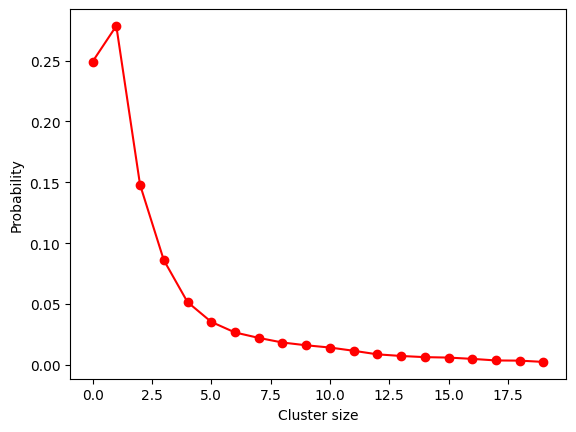

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Your existing data
x = ke.index
y = ke.values

# Interpolate more points for a smoother curve
#x_smooth = np.linspace(x.min(), x.max(),1000)
#y_smooth = np.interp(x_smooth, x, y)

# Plotting
plt.plot(x, y, 'r-o')  # 'r-' for a red line without markers
plt.xlabel('Cluster size')
plt.ylabel('Probability')
# plt.title('Distribution with lambda_a')
plt.show()


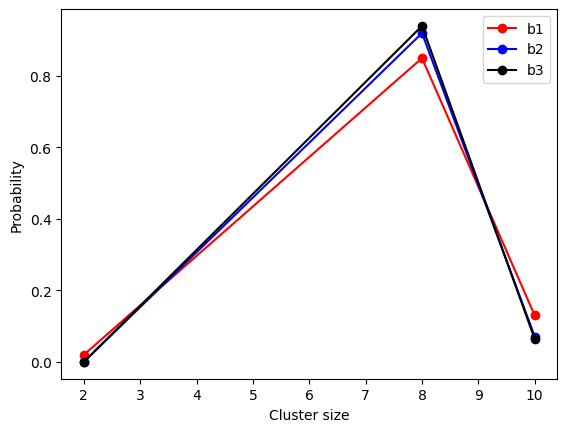

In [141]:
import matplotlib.pyplot as plt
x=[2,8,10]
y1=[0.02,0.85,0.13]
y2=[0.0001,0.92,0.071]
y3=[0.0001,0.94,0.064]

plt.plot(x,y1,'r-o',label='b1')
plt.plot(x,y2,'b-o',label='b2')
plt.plot(x,y3,'k-o',label='b3')
plt.xlabel('Cluster size')
plt.ylabel('Probability')
plt.legend()
plt.show()


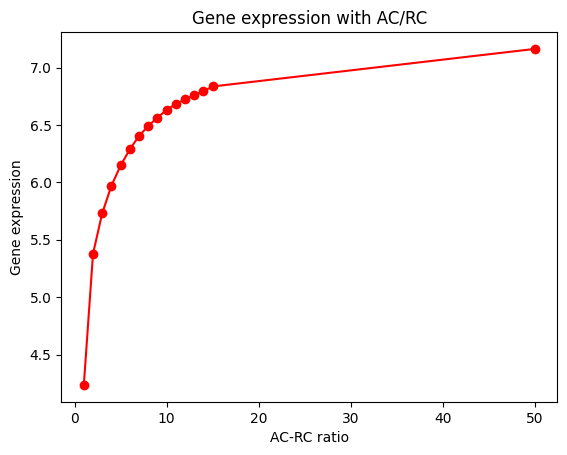

In [6]:
import matplotlib.pyplot as plt
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,50]
y=[4.236,5.379,5.731,5.971,6.147,6.288,6.404,6.4908,6.5645,6.6302,6.682,6.722,6.76,6.793,6.835,7.162]

plt.plot(x,y,'r-o')
plt.xlabel('AC-RC ratio')
plt.ylabel('Gene expression')
plt.title('Gene expression with AC/RC')
plt.show()


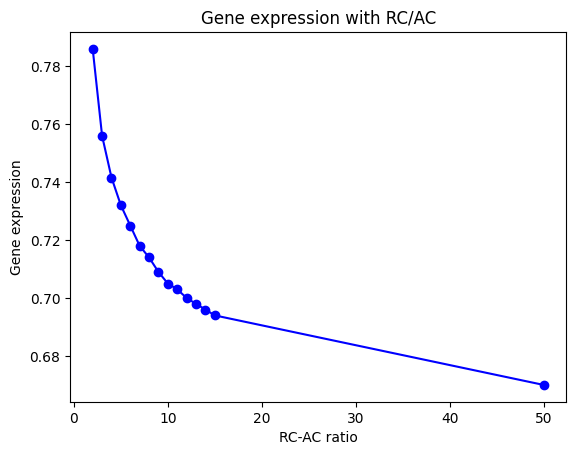

In [1]:
import matplotlib.pyplot as plt
x=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,50]
y=[0.786,0.756,0.7416,0.732,0.725,0.718,0.714,0.709,0.705,0.703,0.7,0.698,0.696,0.694,0.67]

plt.plot(x,y,'b-o')
plt.xlabel('RC-AC ratio')
plt.ylabel('Gene expression')
plt.title('Gene expression with RC/AC')
plt.show()
